In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.pyplot import figure
import pandas as pd

In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [3]:
#Link to install platypus

# https://github.com/Project-Platypus/Platypus?fbclid=IwAR3VssR7uHGCRiROvivIbeUwUboBWLaO3qSMvVwlH7Rja2nh4rBrLheXyeI

#Genetic Algorithm Library
from platypus.algorithms import NSGAII, Problem
#from platypus.algorithms import NSGAII, Problem, Real
from platypus.config import Real

In [ ]:
# Update the dataset (save the updated data)
import urllib.request

print('Beginning file download with urllib2...')

url = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv'
urllib.request.urlretrieve(url, '/media/juliane_oliveira/My Passport/dropbox_15_11_2019/Artigos_preprints/COVID19/data_brasil/estadosnet.csv')

In [4]:
# run code to organize data 

import datetime as dt
def ler_banco(arq,var):
    banco = pd.read_csv(arq)
    banco =banco[banco[var].notnull()]
    if var=='cod_city':
        banco[var] = pd.to_numeric(banco[var],downcast='integer')
    nome_local =list(banco[var].unique())
    for i in banco.index:
        banco.date[i] = dt.datetime.strptime(banco.date[i], '%Y-%m-%d').date()
    nome_local =list(banco[var].unique())
    local = []
    for est in nome_local:
        
    
        aux = banco[banco[var]==est].sort_values('date')
        data_ini = aux.date.iloc[0]
        data_fim = aux.date.iloc[-1]
        dias = (data_fim-data_ini).days + 1
        d = [(data_ini + dt.timedelta(di)) for di in range(dias)]
        if var=='cod_city':
            cod_city = [est for di in range(dias)]
            estado = [aux.state.iloc[0] for di in range(dias)]
            uf = [aux.UF.iloc[0] for di in range(dias)]
            city = [aux.city.iloc[0] for di in range(dias)]
            df = pd.DataFrame({'date':d,'state':estado,'UF':uf,'city':city,var:cod_city})
            df.cod_city =pd.to_numeric(df.cod_city,downcast='integer')
        else:
            estado = [est for di in range(dias)]
            df = pd.DataFrame({'date':d,var:estado})
        
        casos = []
        caso = 0 
        i_aux = 0
        for i in range(dias):
            if (d[i]-aux.date.iloc[i_aux]).days==0:
                caso = aux.totalCases.iloc[i_aux]
                casos.append(caso)
                i_aux=i_aux+1
            else:
                casos.append(caso)
        df['totalCases'] = casos
        local.append(df)
    return nome_local, local   

In [5]:
# read the updated data you downloaded in cell 4
df= ler_banco('/media/juliane_oliveira/My Passport/dropbox_15_11_2019/Artigos_preprints/COVID19/data_brasil/estadosnet.csv','state')

/home/juliane_oliveira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
pop = pd.read_excel('/media/juliane_oliveira/My Passport/dropbox_15_11_2019/Artigos_preprints/COVID19/data_brasil/popUF.xlsx')

2020-02-25
Resultados gerais para o estado SP
 Gamma  Beta   R0 
 1/5    0.43  2.17


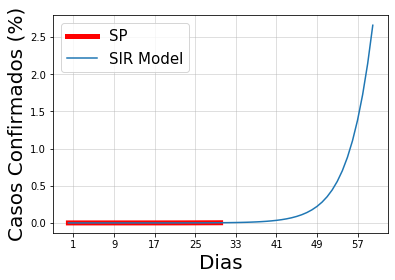

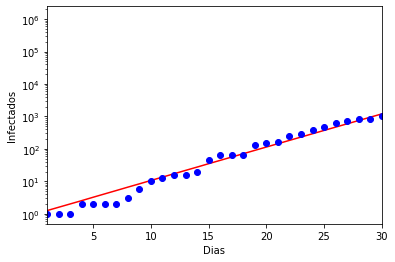

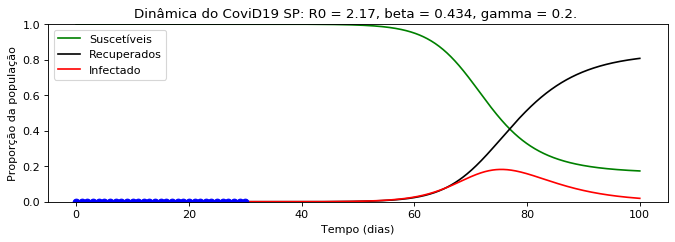

 1/14    0.31  4.28


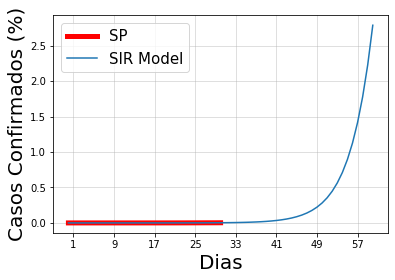

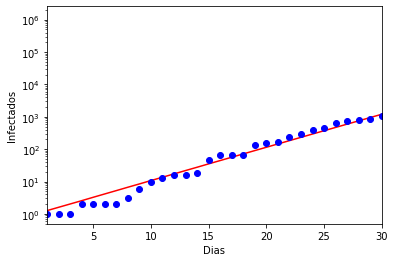

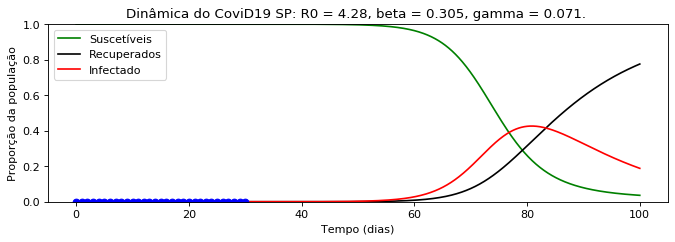

 1/21    0.28  5.68


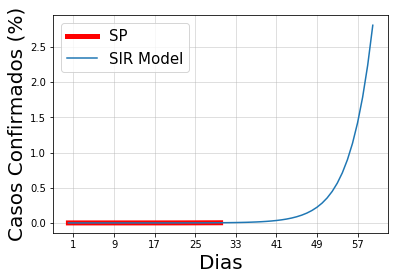

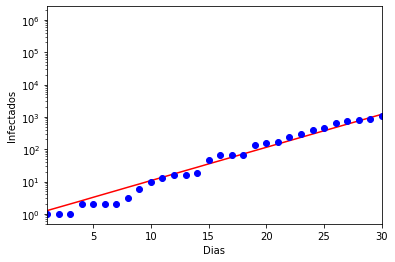

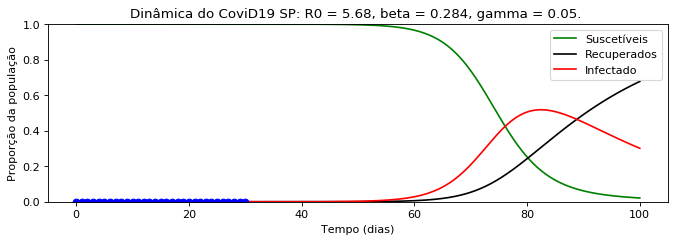



2020-02-25
Resultados gerais para o estado TOTAL
 Gamma  Beta   R0 
 1/5    0.46  2.32


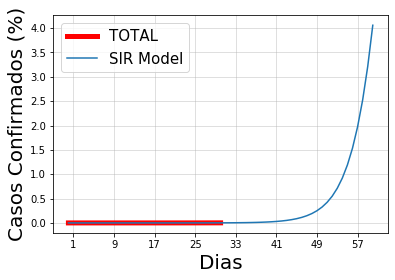

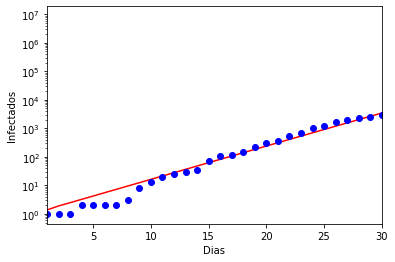

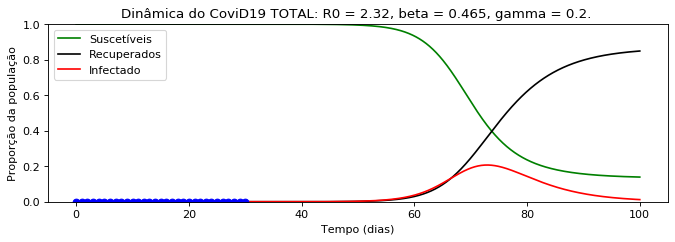

 1/14    0.34  4.71


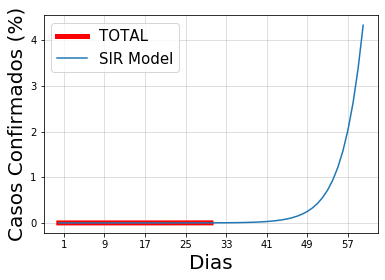

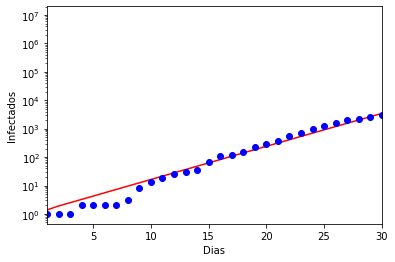

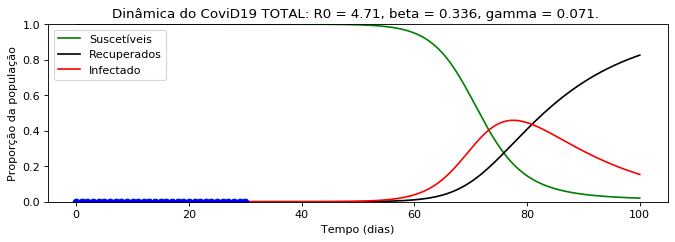

 1/21    0.31  6.3


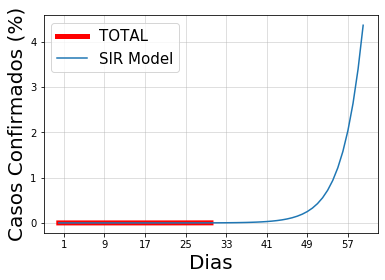

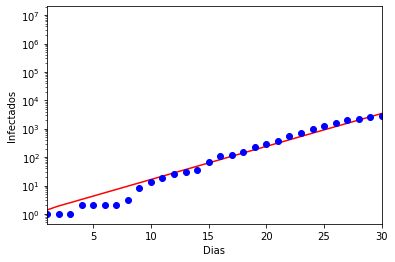

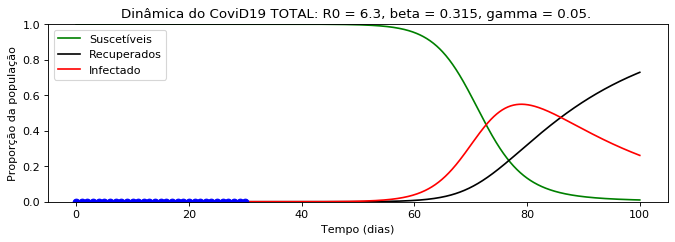



2020-03-05
Resultados gerais para o estado RJ
 Gamma  Beta   R0 
 1/5    0.49  2.45


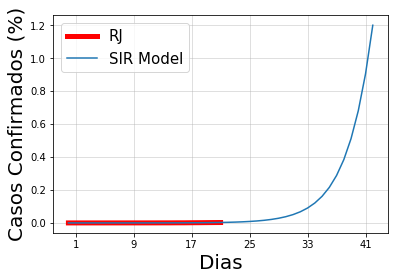

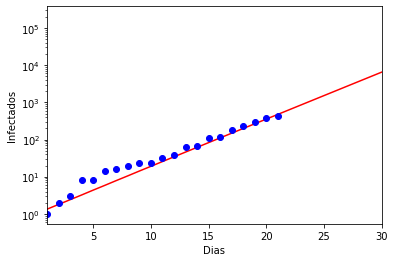

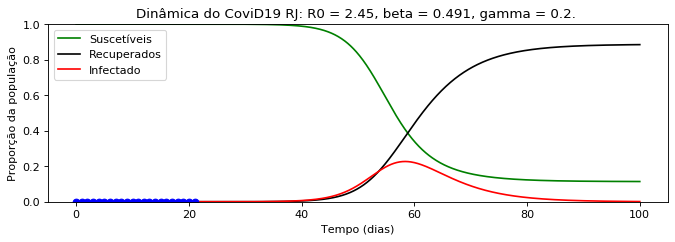

 1/14    0.36  5.07


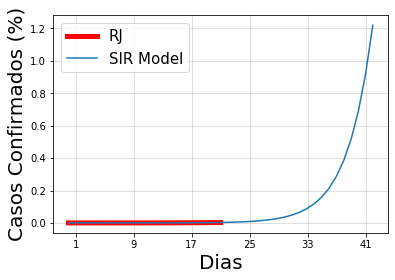

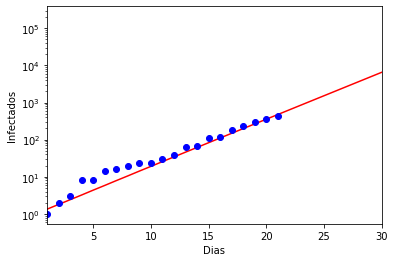

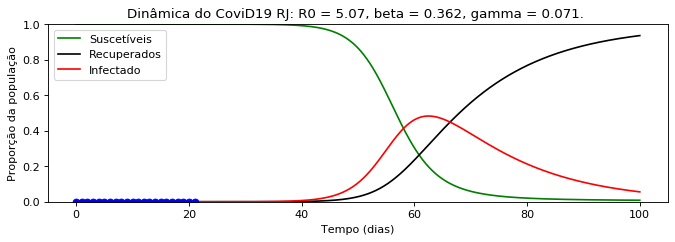

 1/21    0.34  6.82


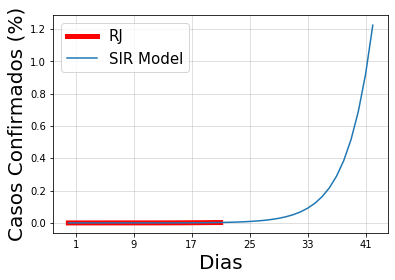

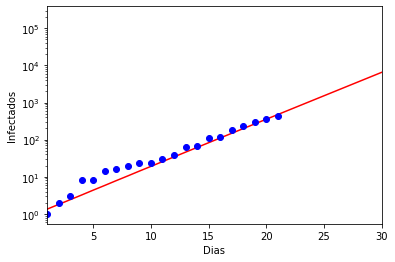

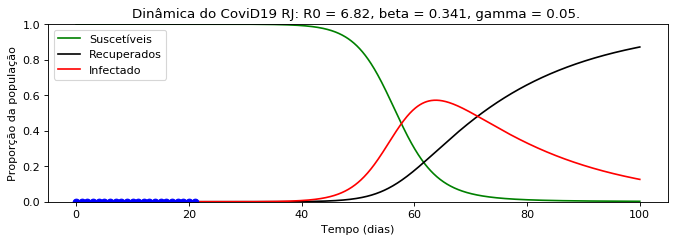



2020-03-05
Resultados gerais para o estado ES
 Gamma  Beta   R0 
 1/5    0.38  1.92


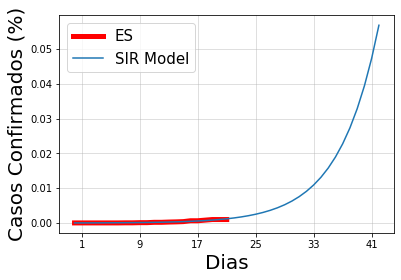

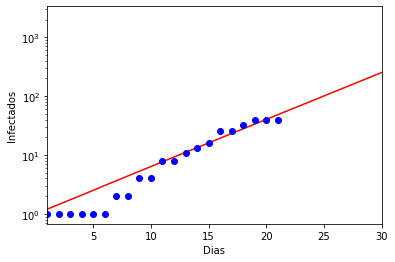

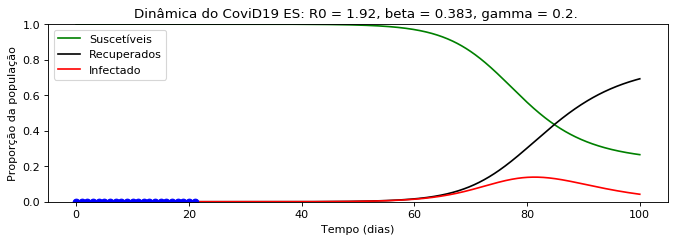

 1/14    0.25  3.56


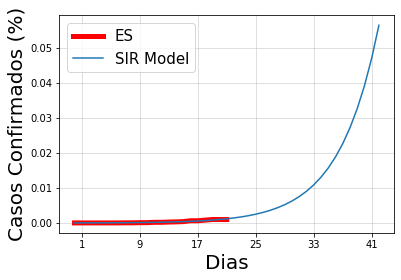

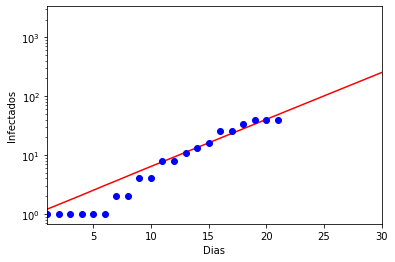

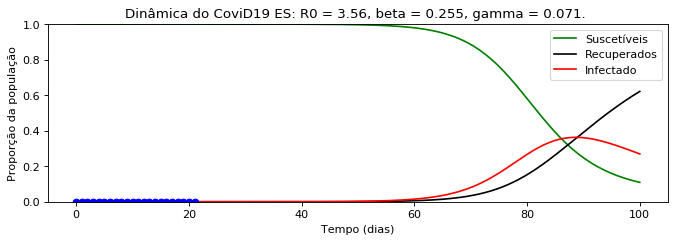

 1/21    0.23  4.66


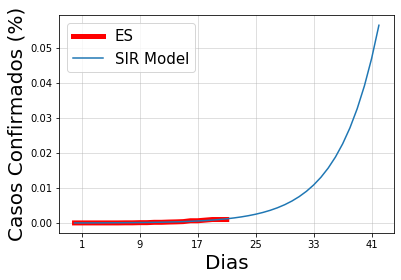

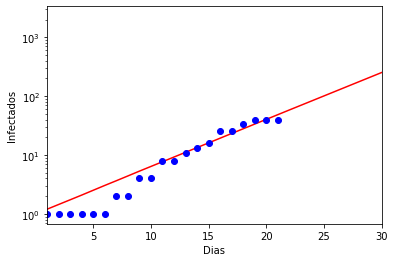

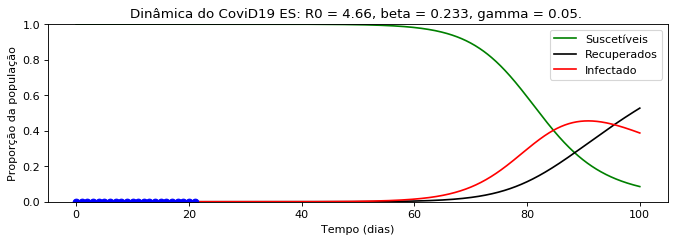



2020-03-06
Resultados gerais para o estado BA
 Gamma  Beta   R0 
 1/5    0.4  1.99


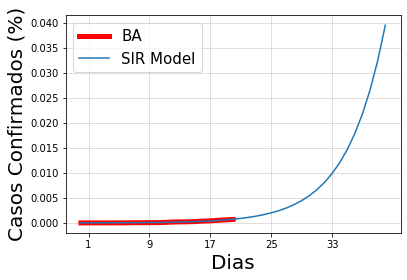

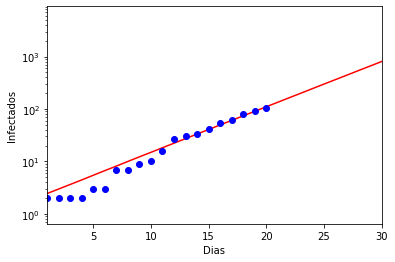

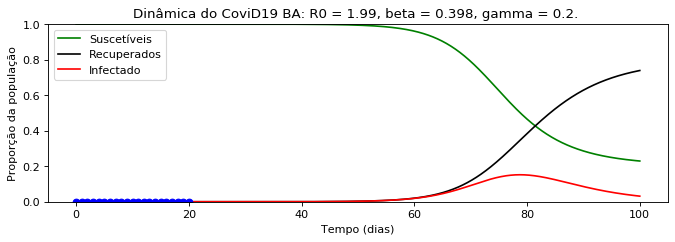

 1/14    0.27  3.78


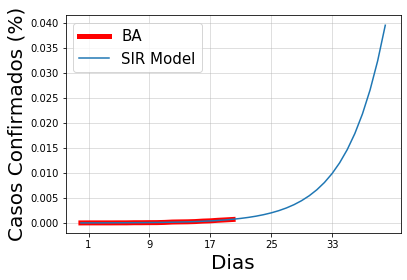

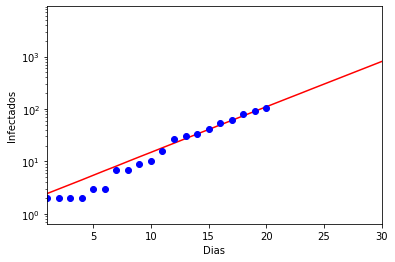

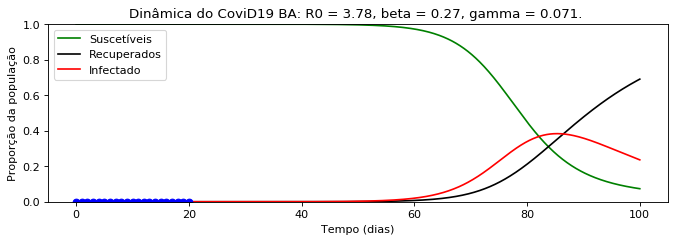

 1/21    0.25  4.97


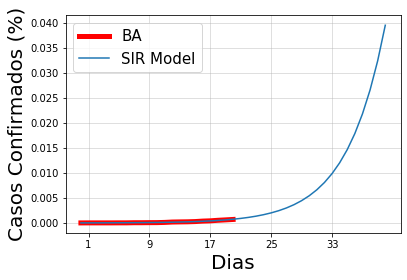

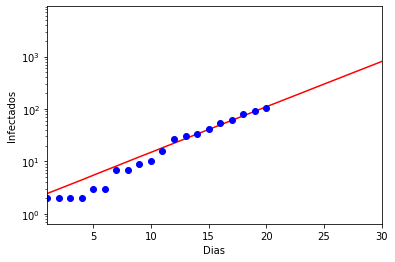

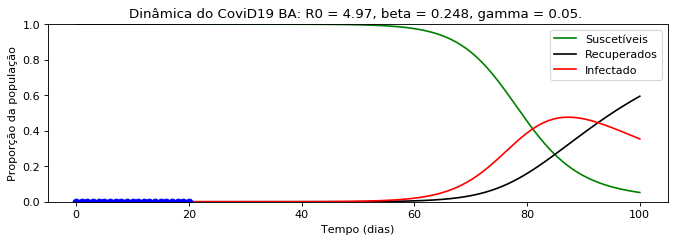



2020-03-07
Resultados gerais para o estado DF
 Gamma  Beta   R0 
 1/5    0.49  2.46


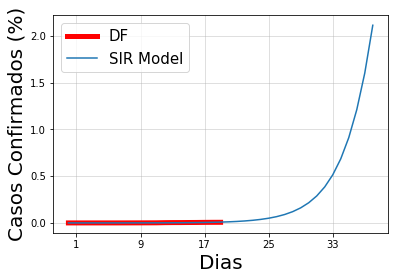

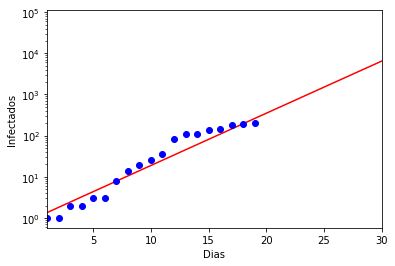

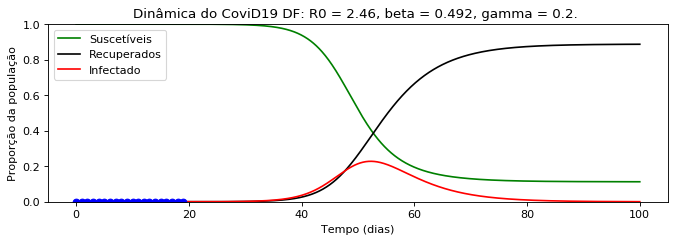

 1/14    0.36  5.09


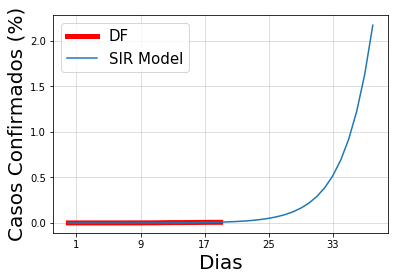

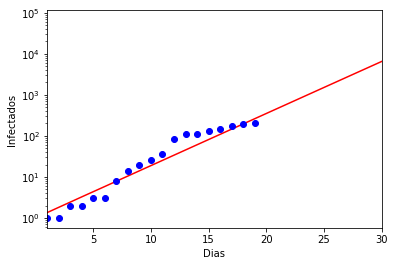

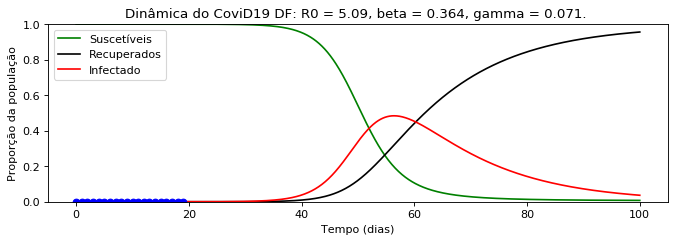

 1/21    0.34  6.85


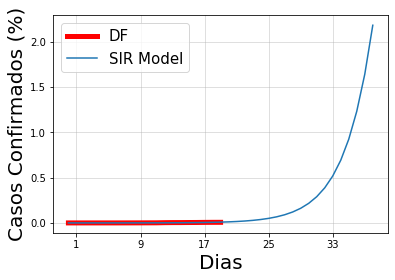

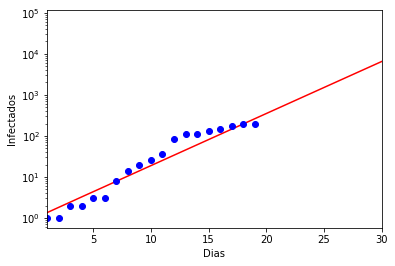

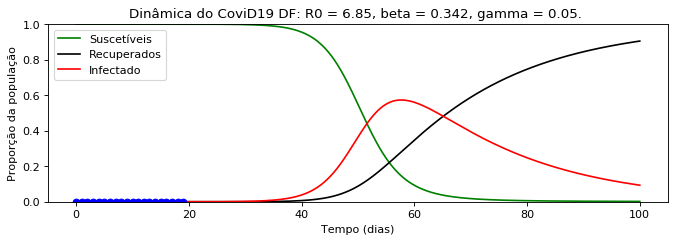



2020-03-08
Resultados gerais para o estado AL
 Gamma  Beta   R0 
 1/5    0.24  2.33


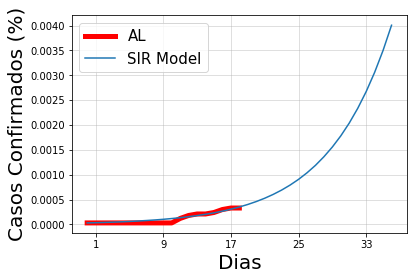

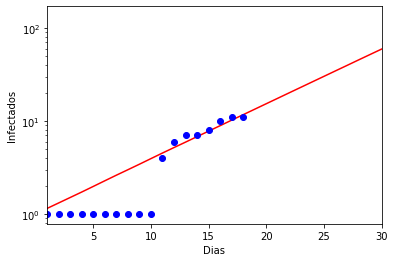

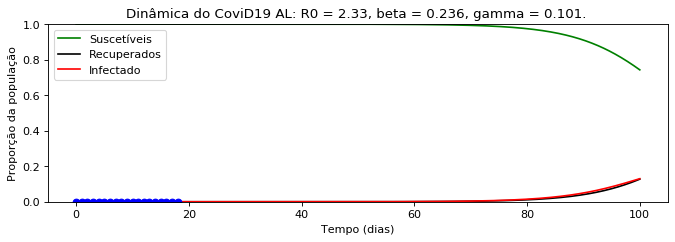

 1/14    0.21  2.89


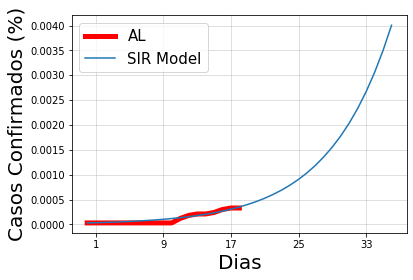

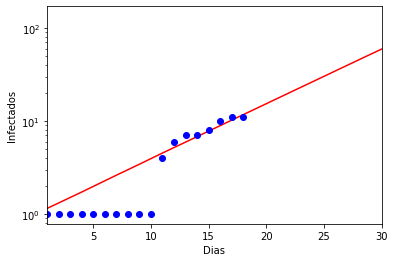

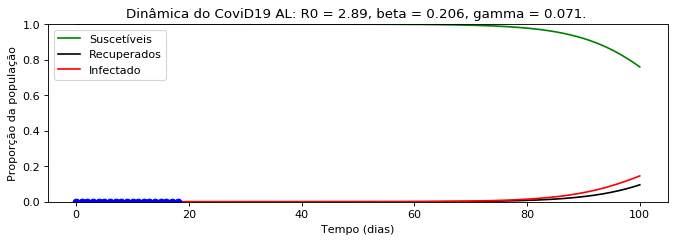

 1/21    0.18  3.7


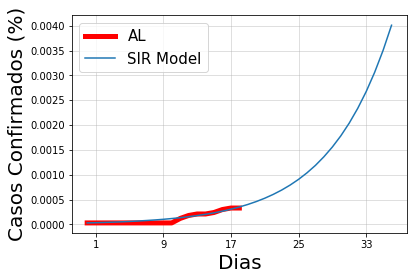

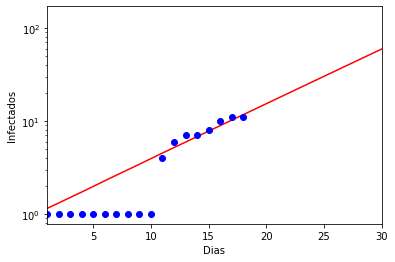

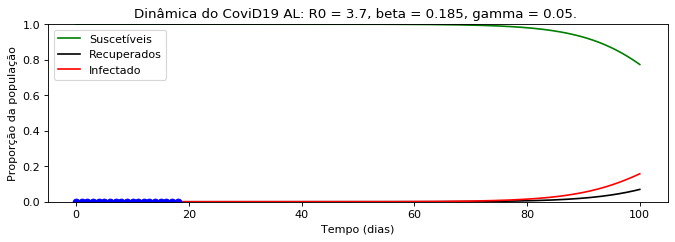



2020-03-08
Resultados gerais para o estado MG
 Gamma  Beta   R0 
 1/5    0.49  2.44


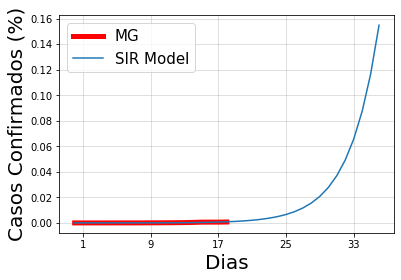

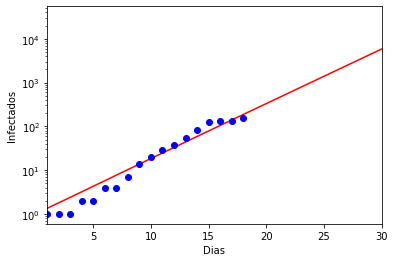

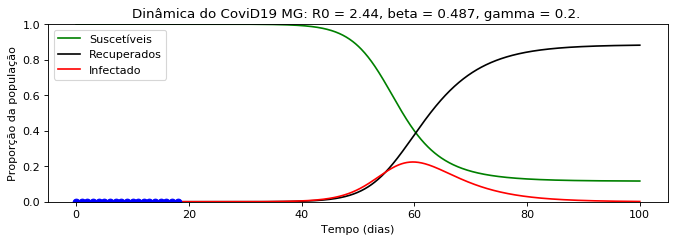

 1/14    0.36  5.02


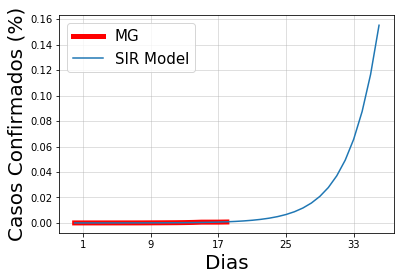

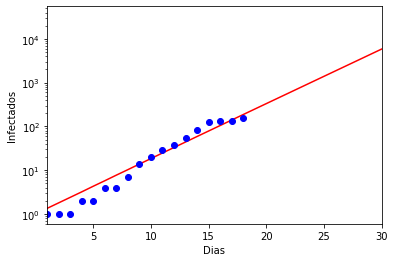

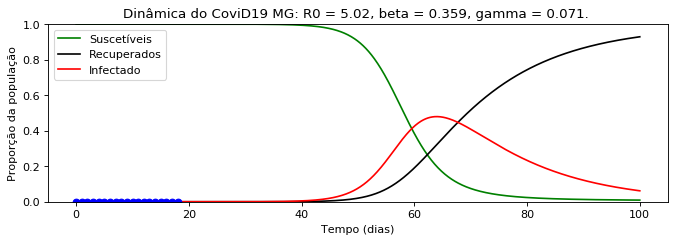

 1/21    0.34  6.74


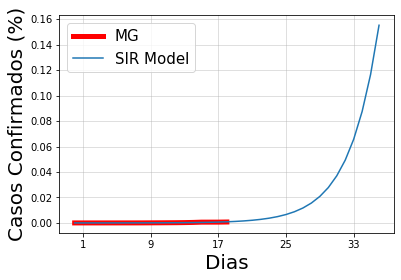

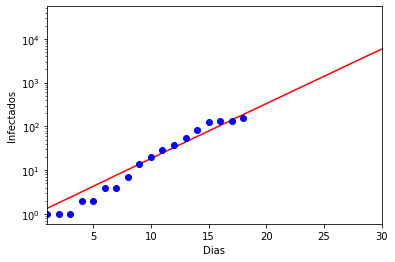

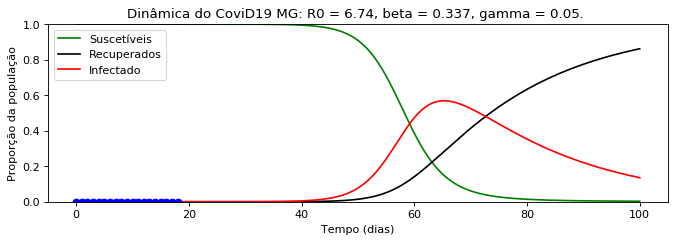



2020-03-10
Resultados gerais para o estado RS
 Gamma  Beta   R0 
 1/5    0.48  2.42


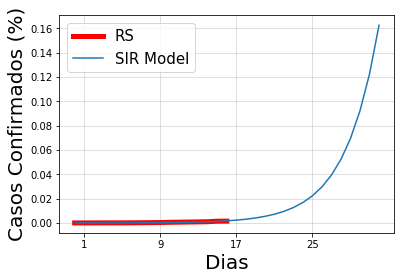

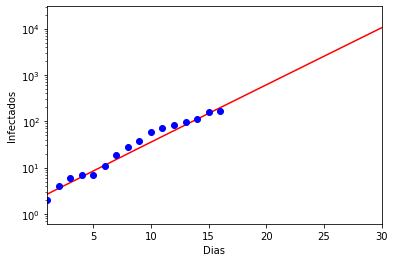

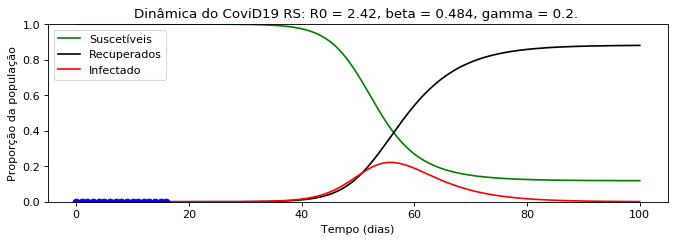

 1/14    0.36  4.98


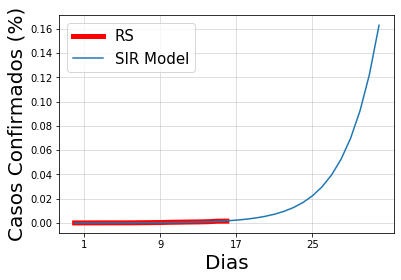

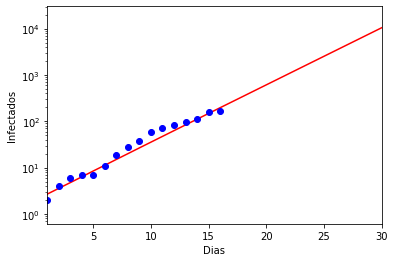

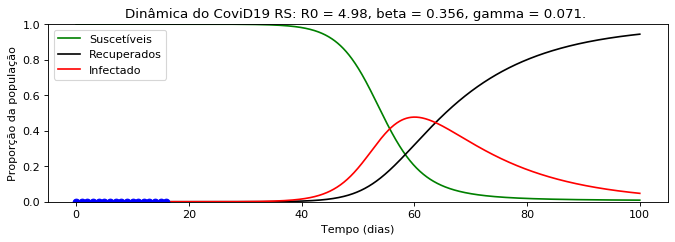

 1/21    0.33  6.68


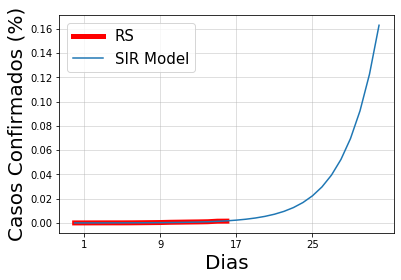

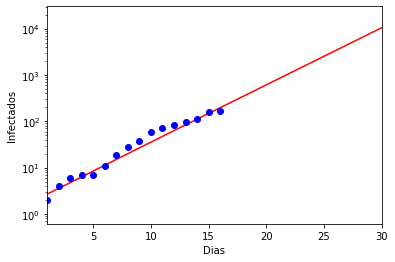

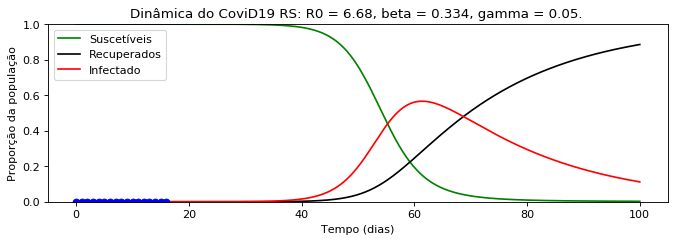



2020-03-12
Resultados gerais para o estado PE
 Gamma  Beta   R0 
 1/5    0.44  2.22


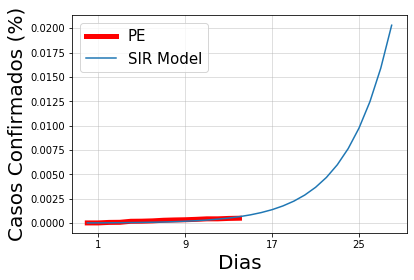

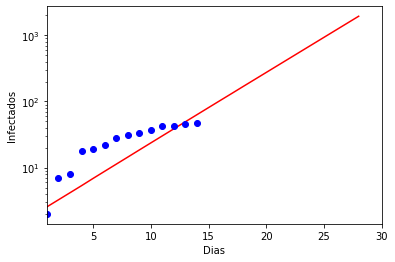

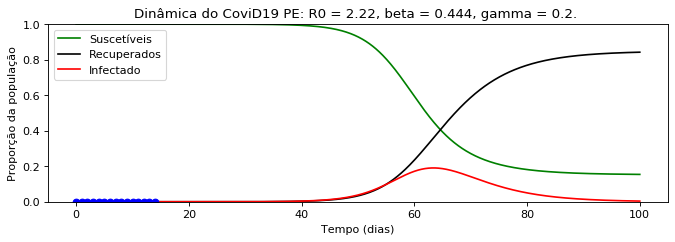

 1/14    0.32  4.42


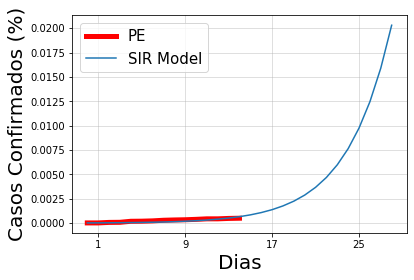

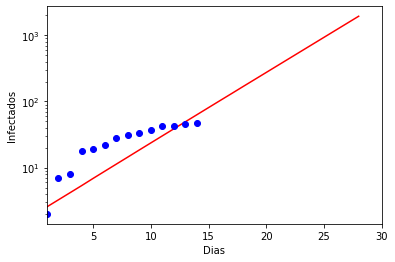

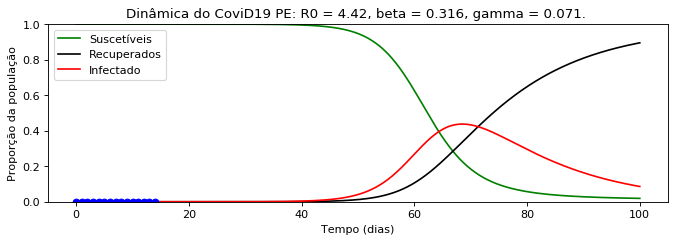

 1/21    0.29  5.88


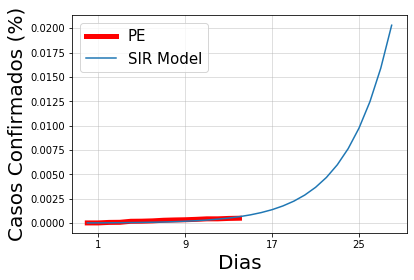

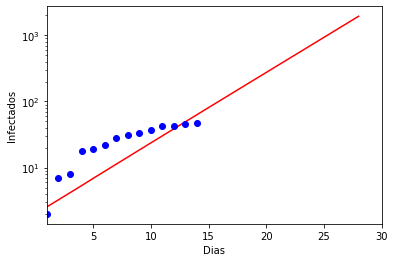

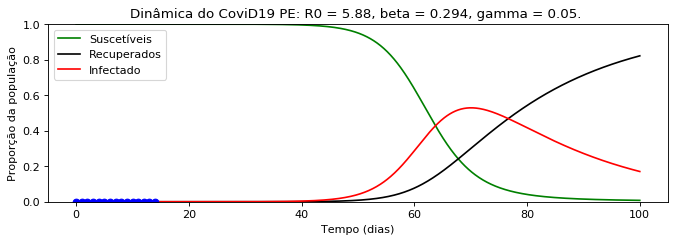



2020-03-12
Resultados gerais para o estado PR
 Gamma  Beta   R0 
 1/5    0.41  2.04


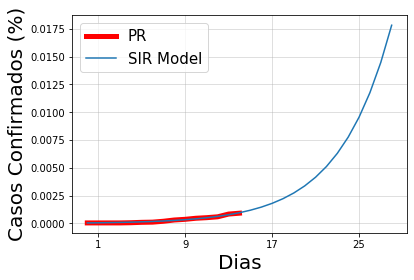

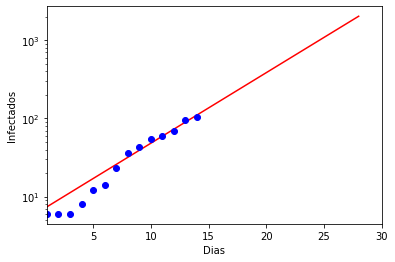

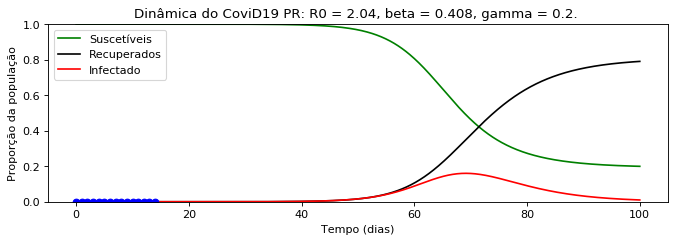

 1/14    0.28  3.91


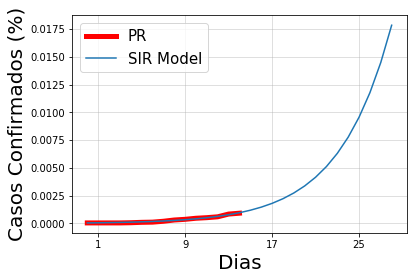

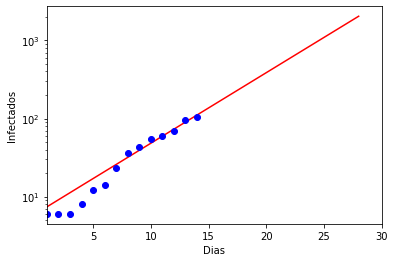

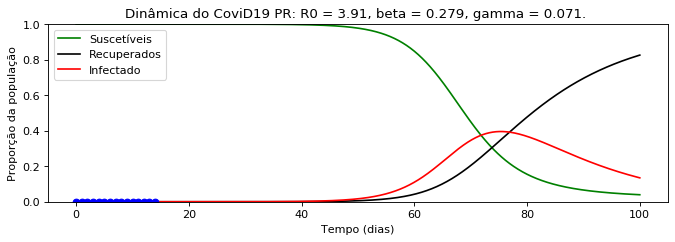

 1/21    0.26  5.16


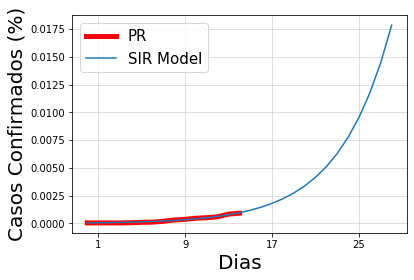

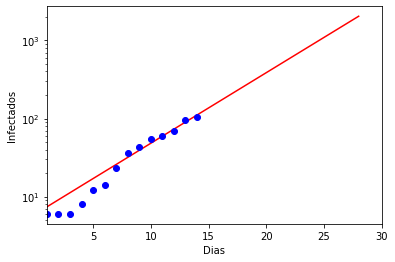

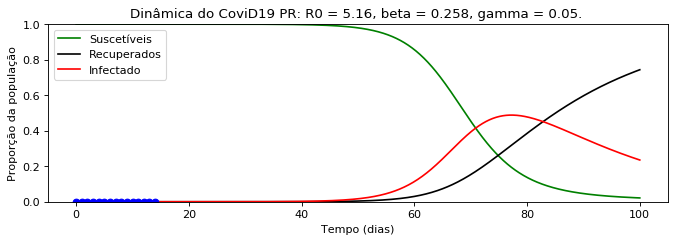



2020-03-12
Resultados gerais para o estado SC
 Gamma  Beta   R0 
 1/5    0.48  2.4


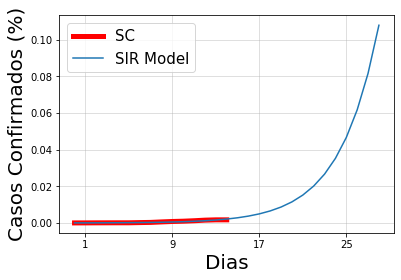

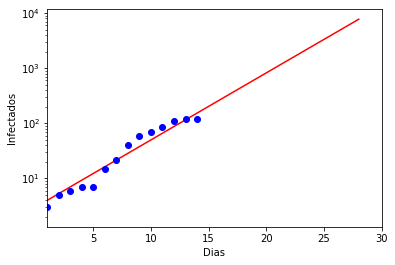

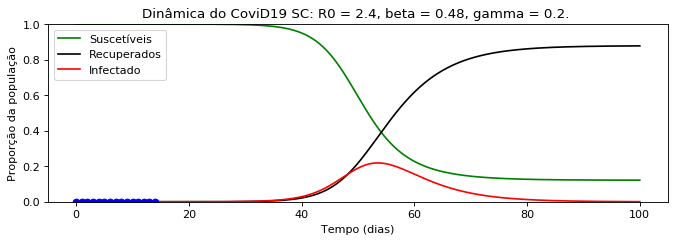

 1/14    0.35  4.92


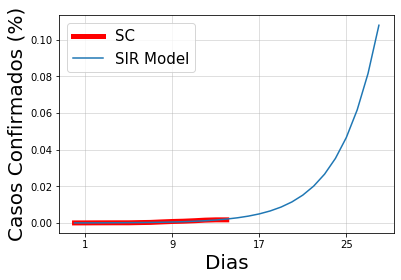

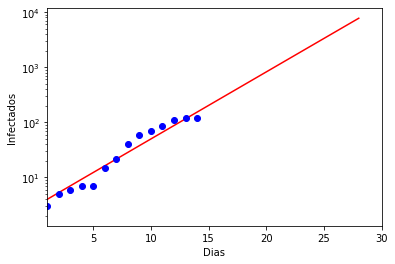

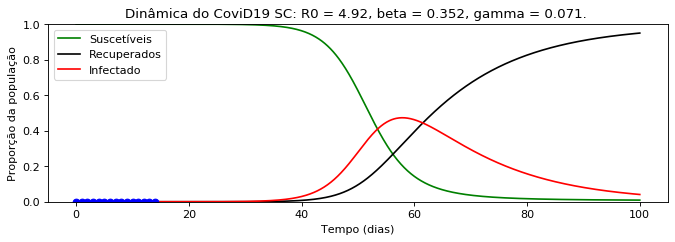

 1/21    0.33  6.6


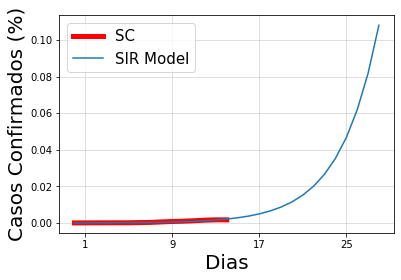

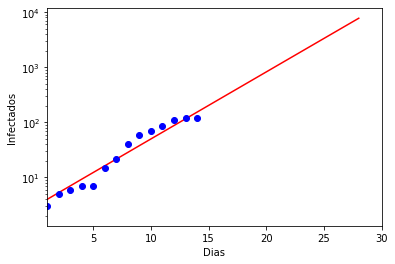

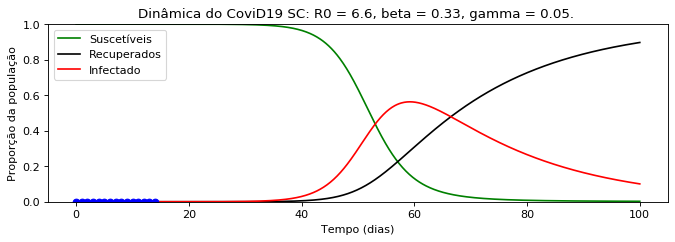



2020-03-12
Resultados gerais para o estado GO
 Gamma  Beta   R0 
 1/5    0.39  1.94


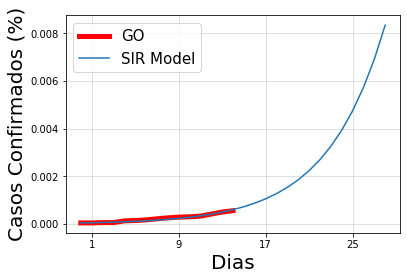

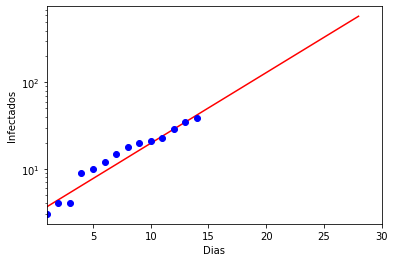

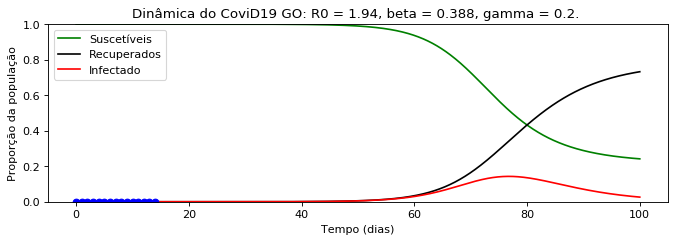

 1/14    0.26  3.63


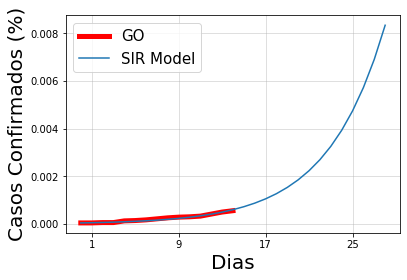

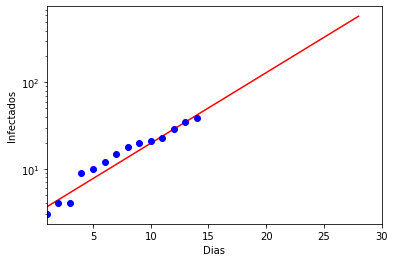

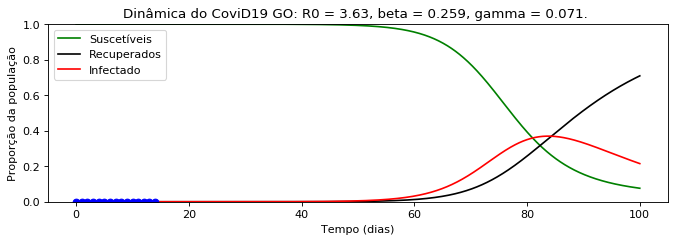

 1/21    0.24  4.76


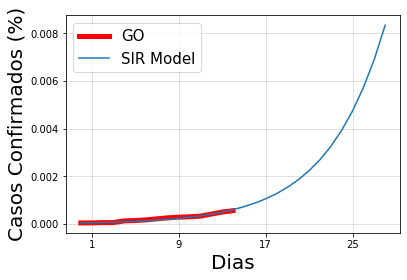

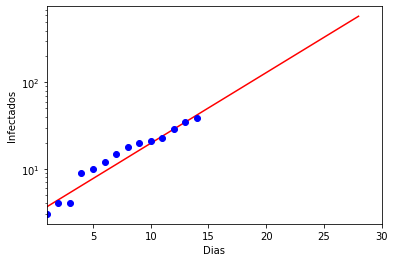

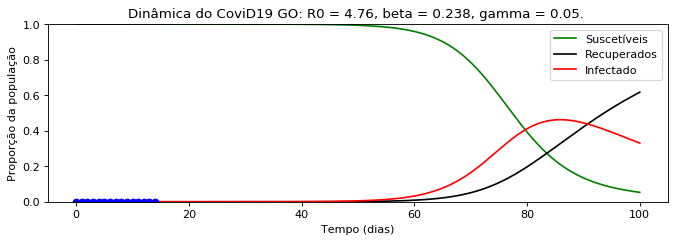



2020-03-12
Resultados gerais para o estado RN
 Gamma  Beta   R0 
 1/5    0.41  2.06


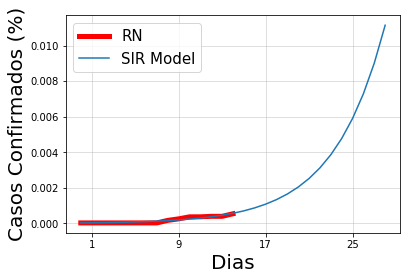

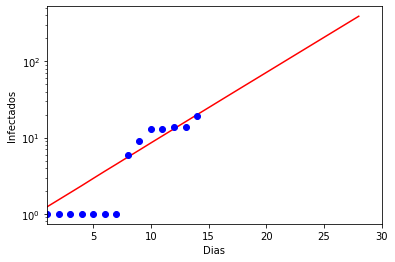

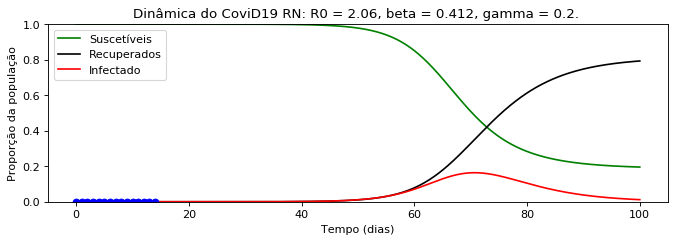

 1/14    0.28  3.97


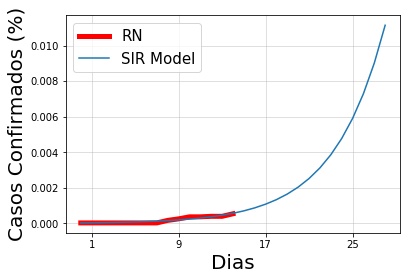

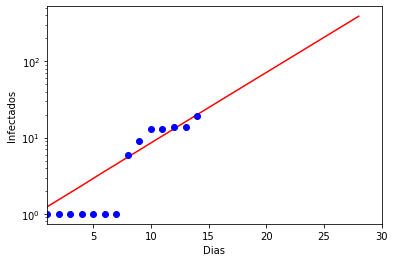

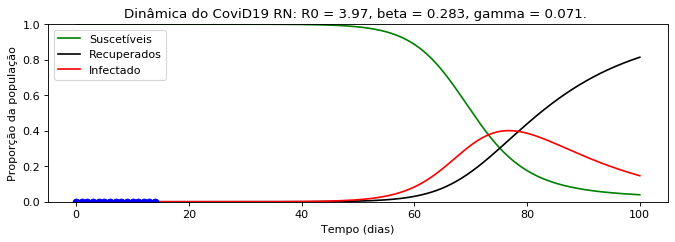

 1/21    0.26  5.24


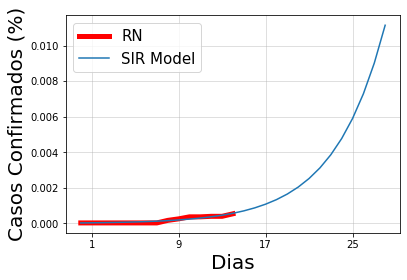

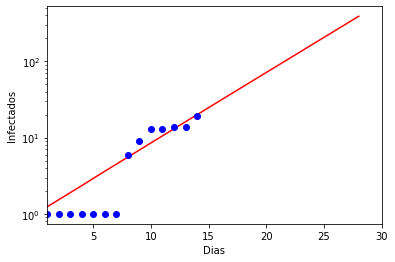

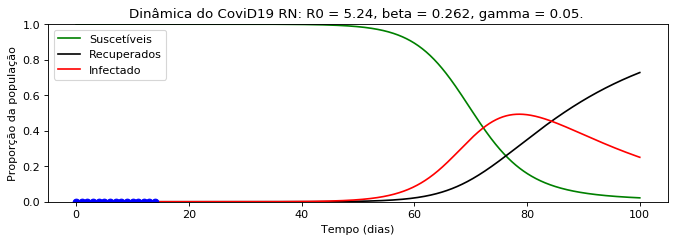



2020-03-13
Resultados gerais para o estado AM
 Gamma  Beta   R0 
 1/5    0.53  2.64


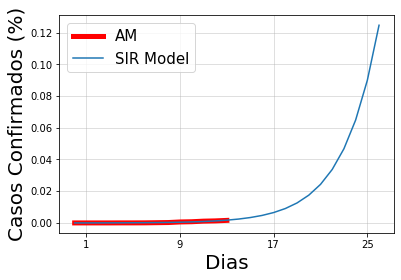

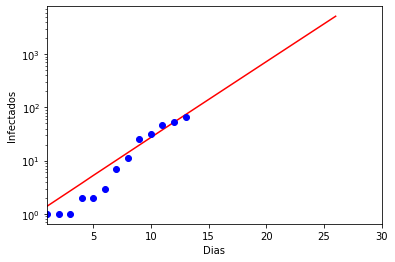

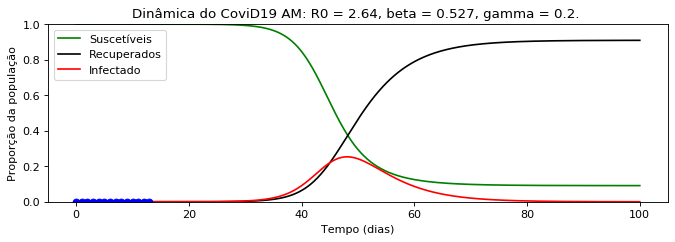

 1/14    0.4  5.58


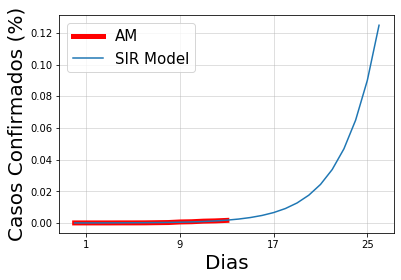

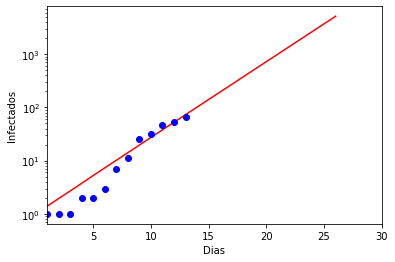

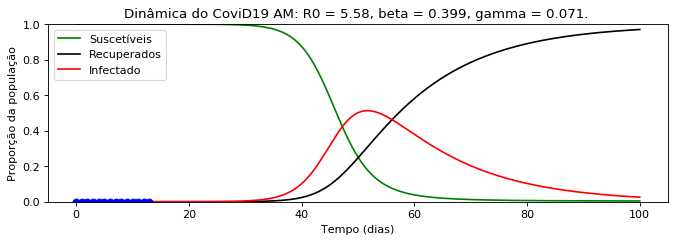

 1/21    0.38  7.55


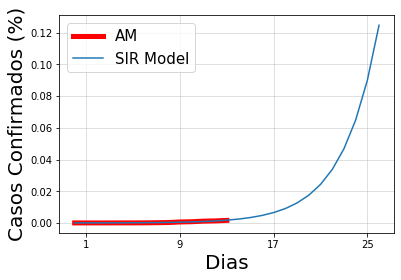

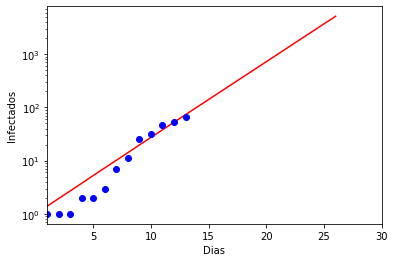

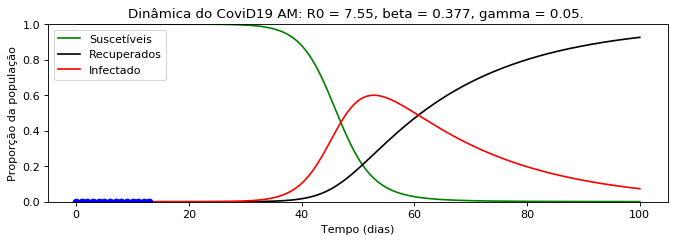



2020-03-14
Resultados gerais para o estado MS
 Gamma  Beta   R0 
 1/5    0.43  2.15


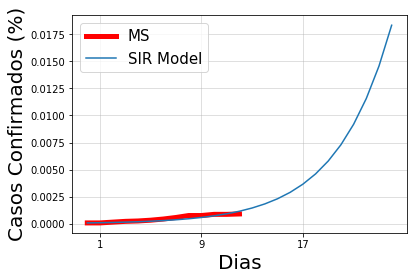

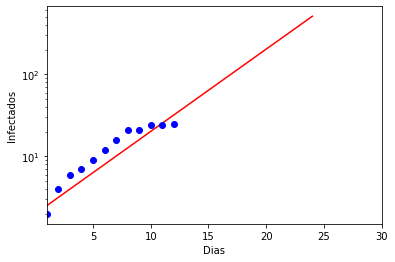

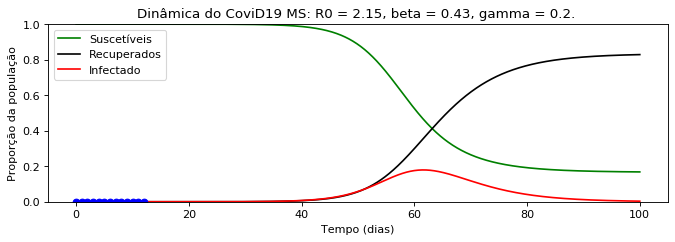

 1/14    0.3  4.23


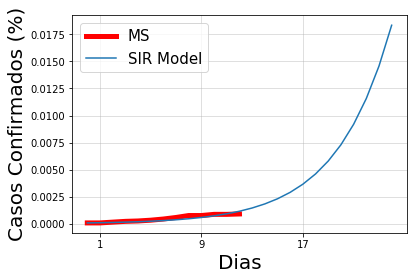

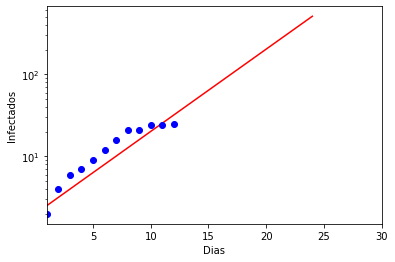

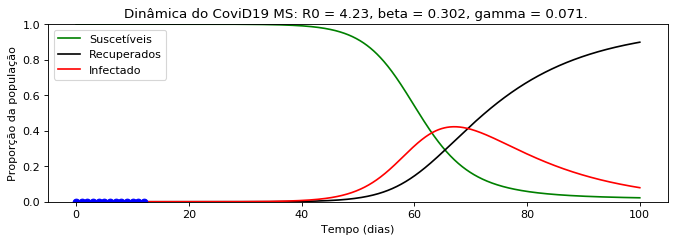

 1/21    0.28  5.61


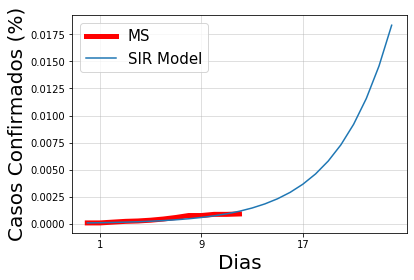

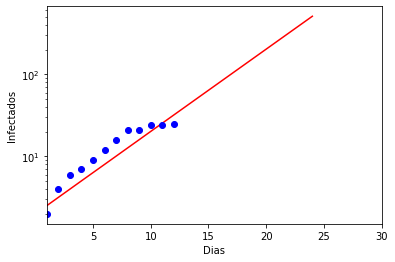

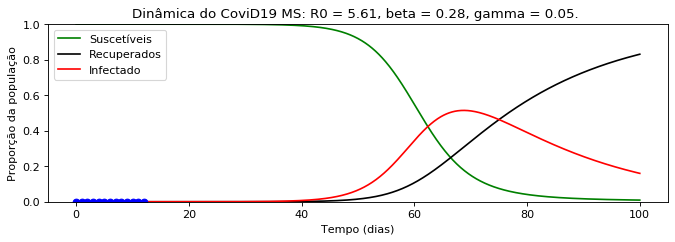



2020-03-14
Resultados gerais para o estado SE
 Gamma  Beta   R0 
 1/5    0.45  2.24


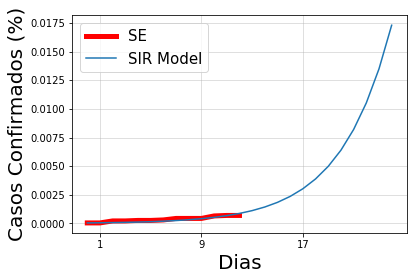

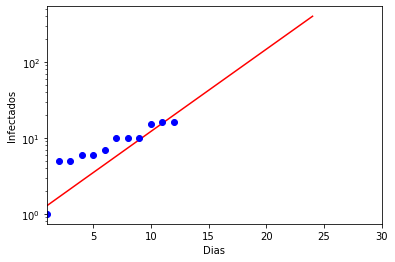

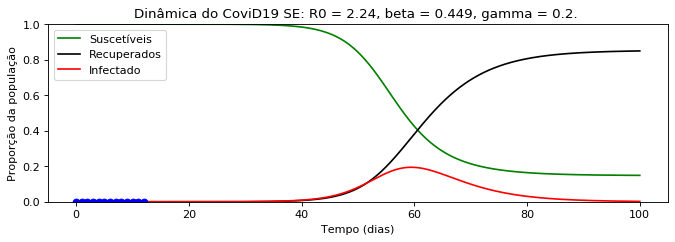

 1/14    0.32  4.48


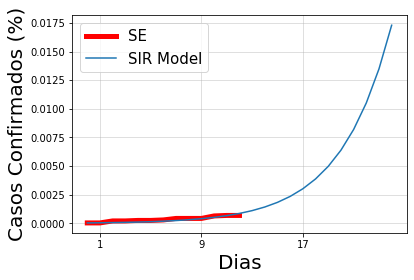

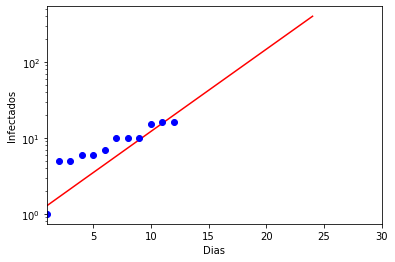

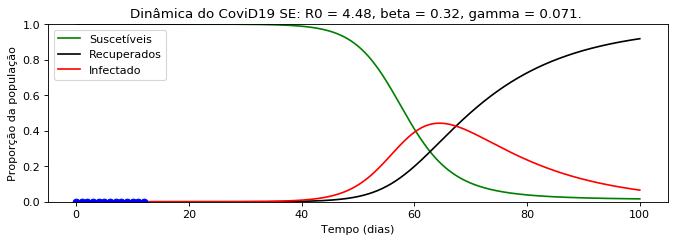

 1/21    0.3  5.98


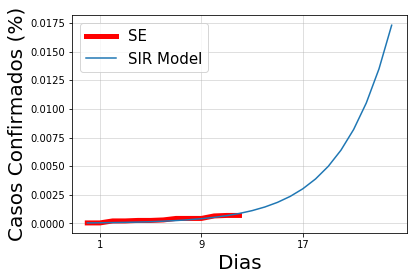

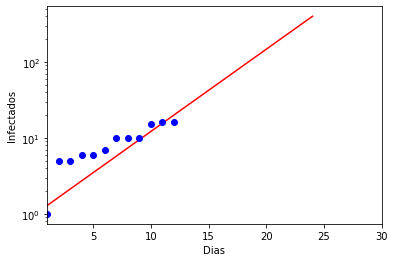

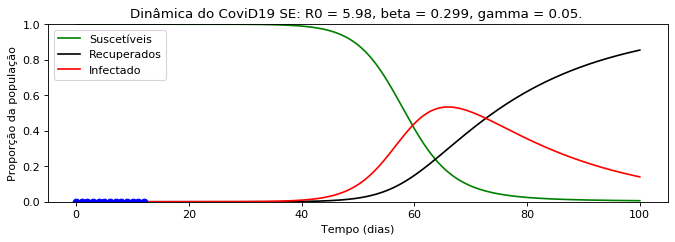



2020-03-15
Resultados gerais para o estado CE
 Gamma  Beta   R0 
 1/5    0.51  2.56


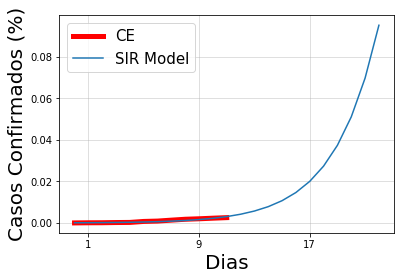

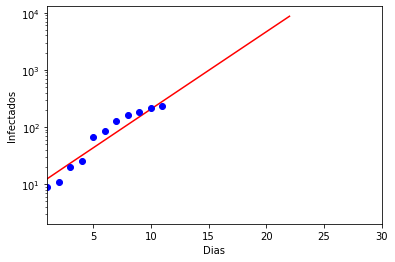

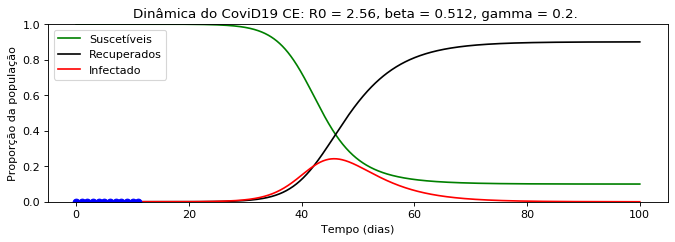

 1/14    0.38  5.37


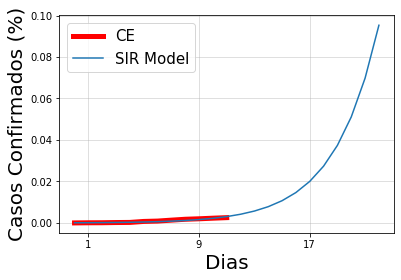

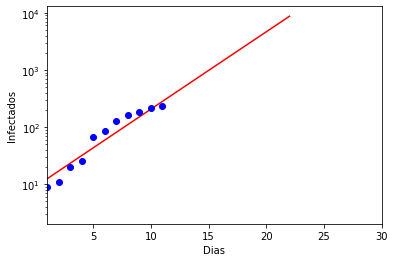

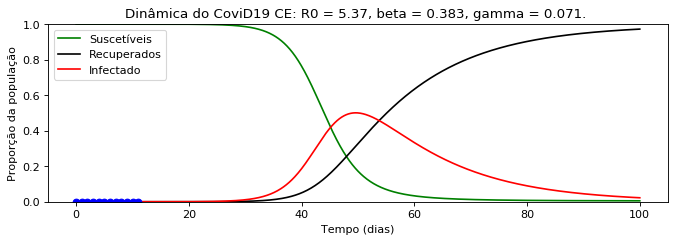

 1/21    0.36  7.24


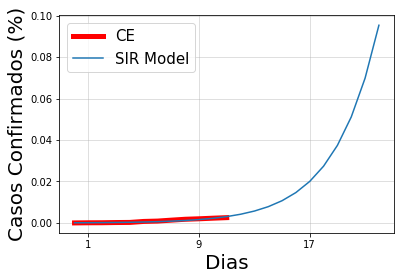

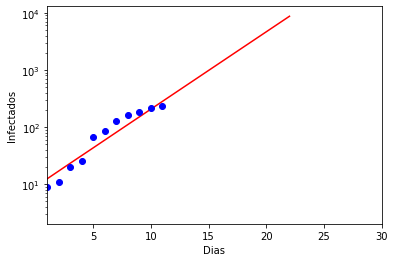

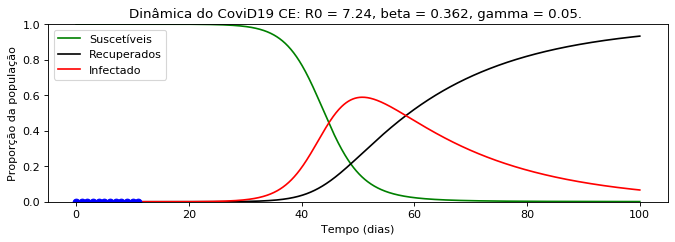



2020-03-17
Resultados gerais para o estado AC
 Gamma  Beta   R0 
 1/5    0.45  2.24


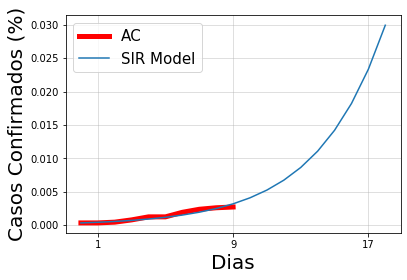

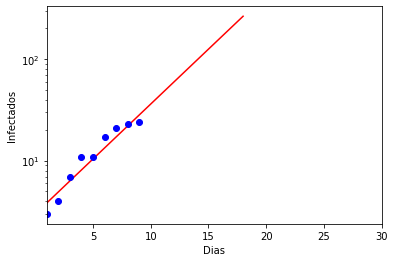

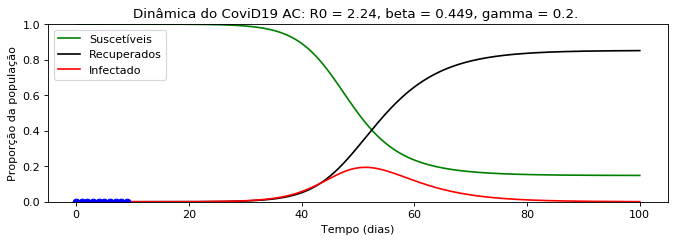

 1/14    0.32  4.48


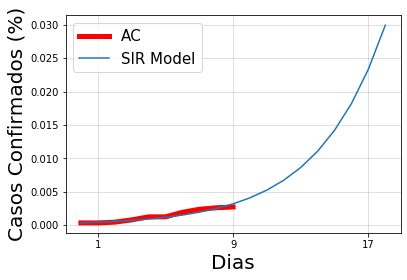

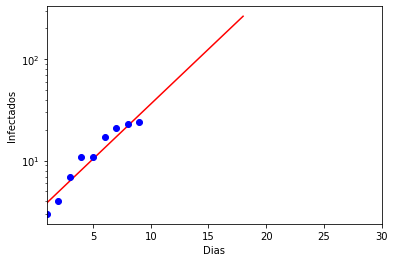

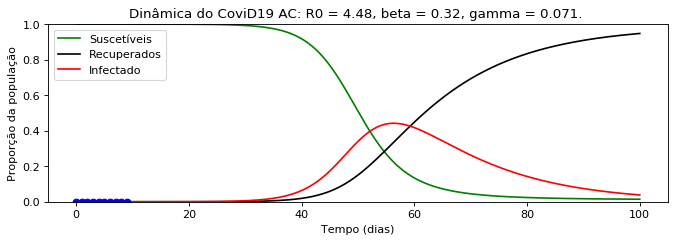

 1/21    0.3  5.97


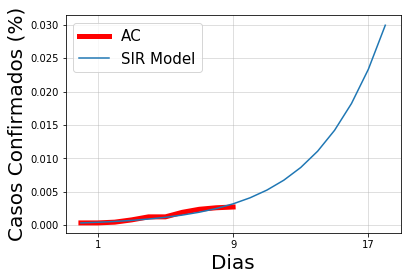

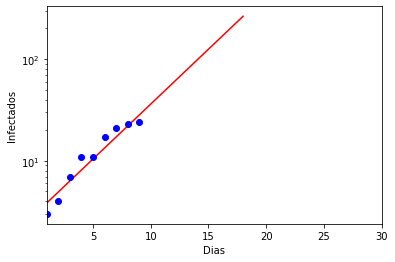

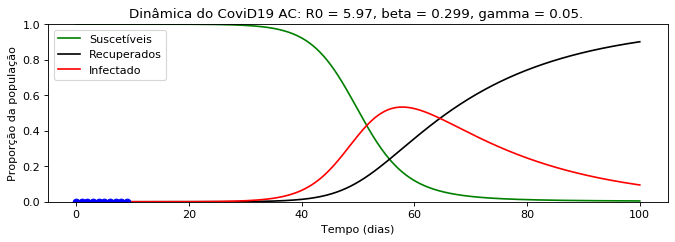



2020-03-17
Resultados gerais para o estado MT
 Gamma  Beta   R0 
 1/5    0.48  2.41


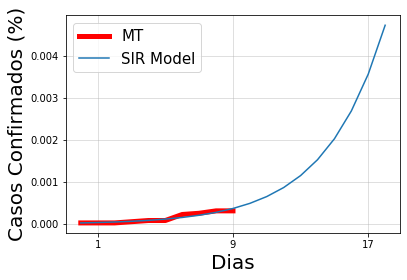

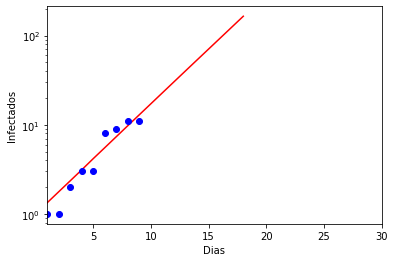

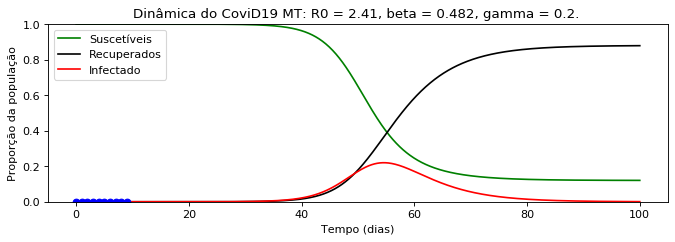

 1/14    0.35  4.94


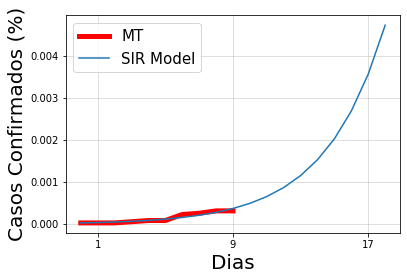

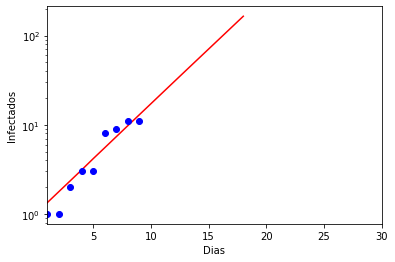

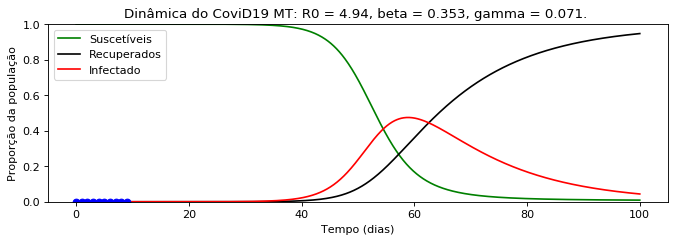

 1/21    0.33  6.64


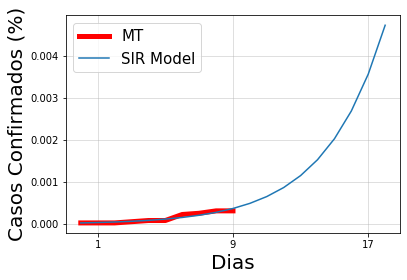

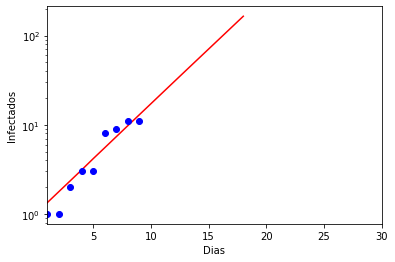

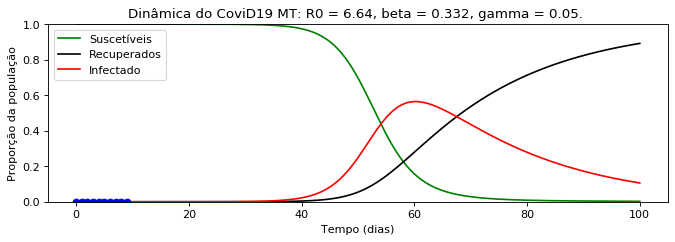



2020-03-18
Resultados gerais para o estado TO
 Gamma  Beta   R0 
 1/5    0.47  2.37


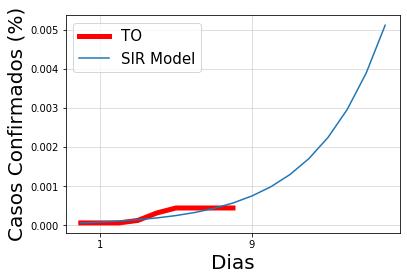

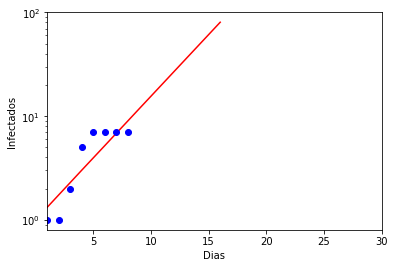

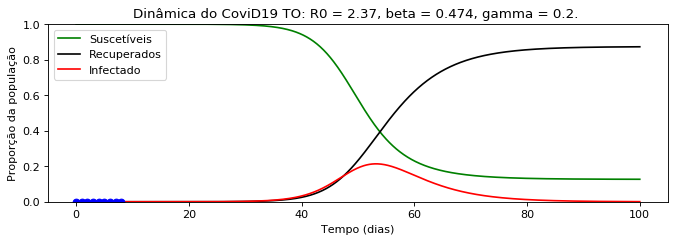

 1/14    0.34  4.83


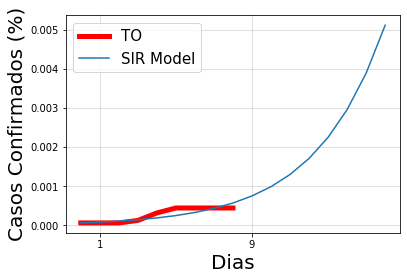

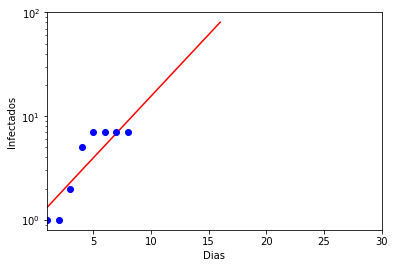

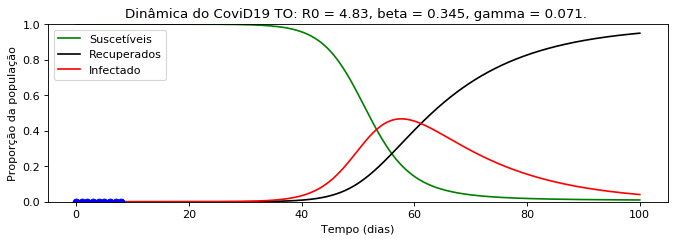

 1/21    0.32  6.47


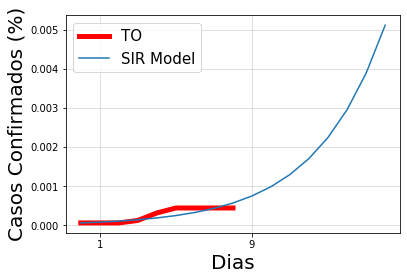

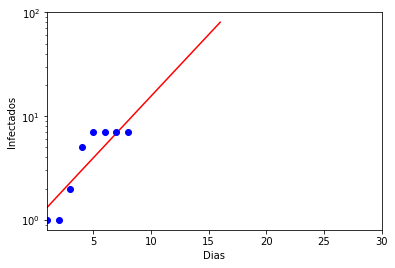

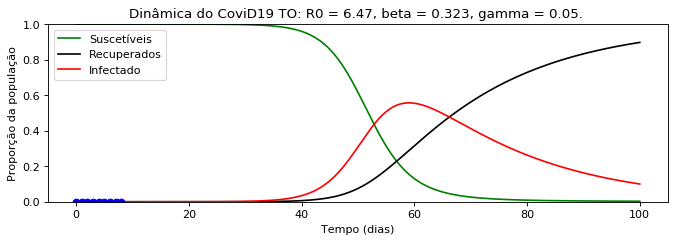



2020-03-18
Resultados gerais para o estado PA
 Gamma  Beta   R0 
 1/5    0.51  2.55


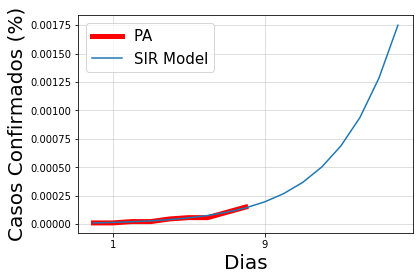

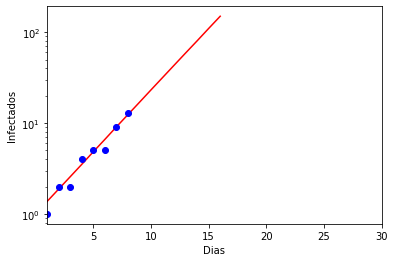

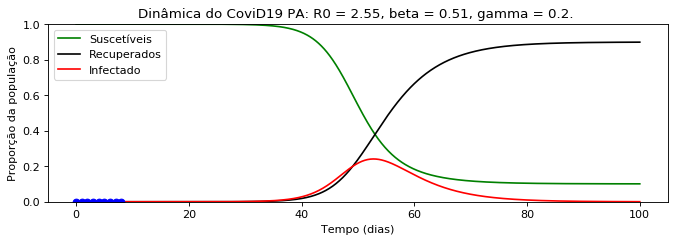

 1/14    0.38  5.35


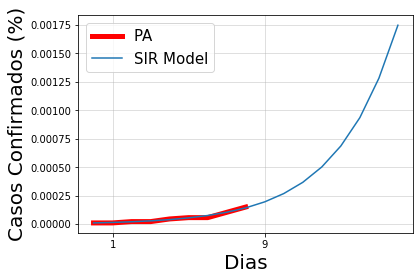

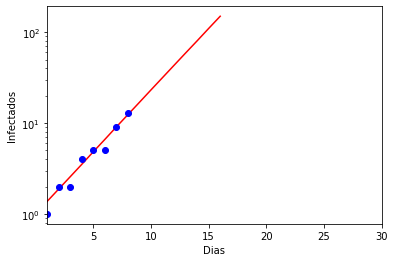

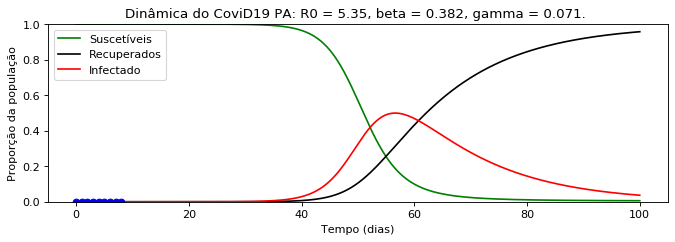

 1/21    0.36  7.21


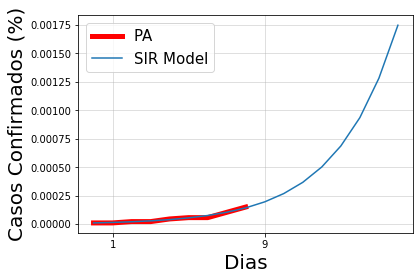

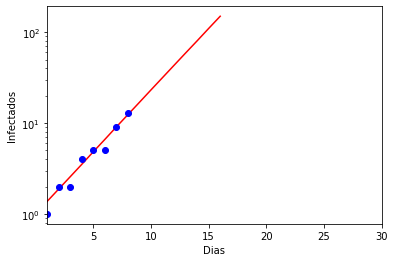

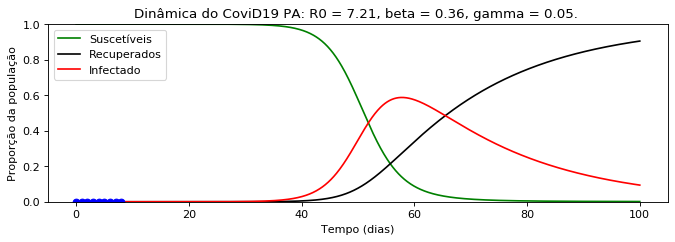



2020-03-18
Resultados gerais para o estado PB
 Gamma  Beta   R0 
 1/5    0.4  1.98


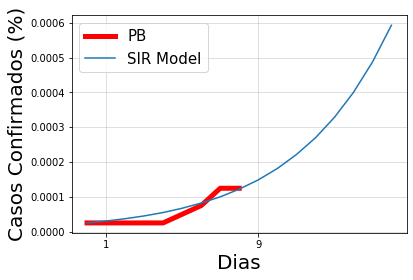

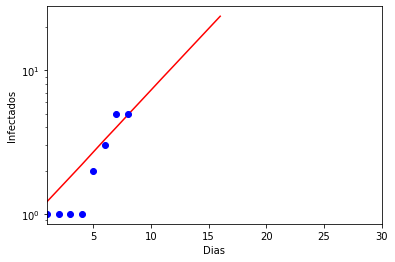

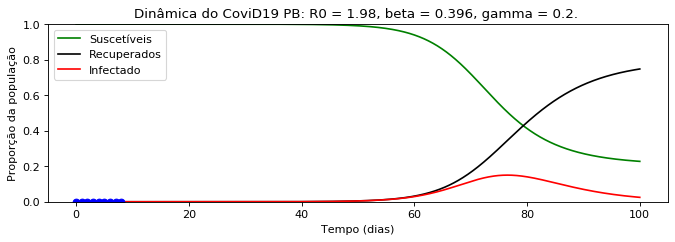

 1/14    0.27  3.75


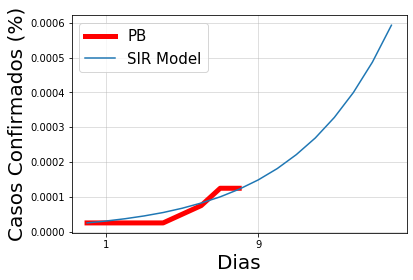

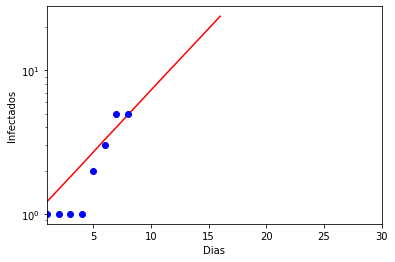

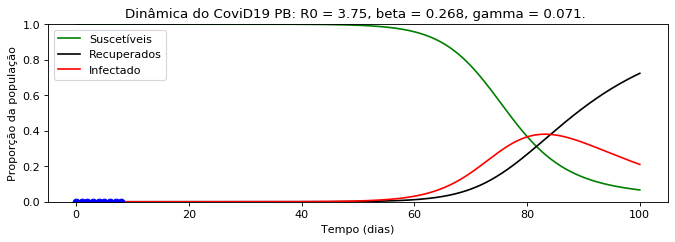

 1/21    0.25  4.92


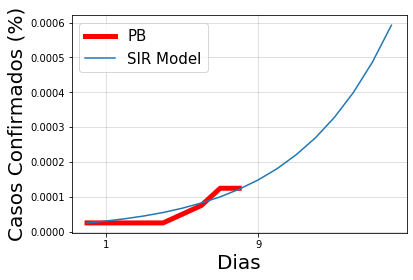

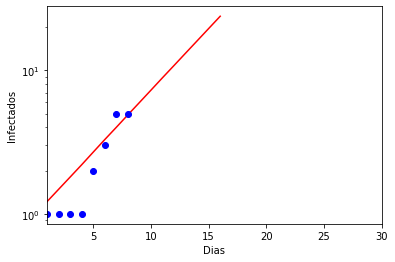

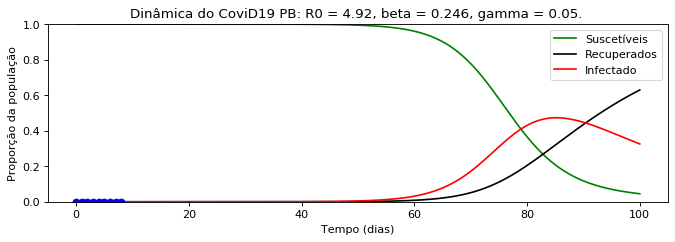



2020-03-19
Resultados gerais para o estado PI
 Gamma  Beta   R0 
 1/5    0.32  1.59


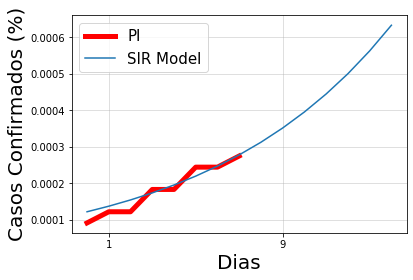

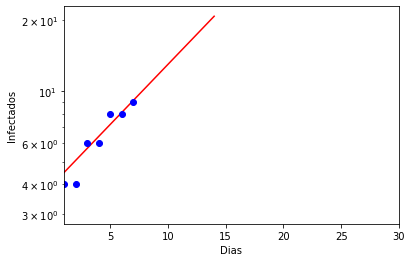

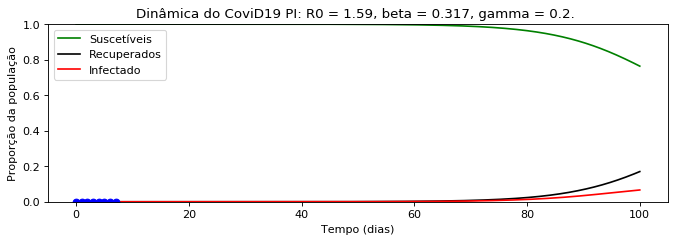

 1/14    0.19  2.64


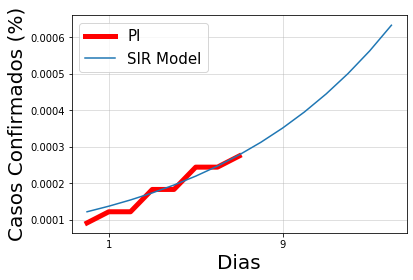

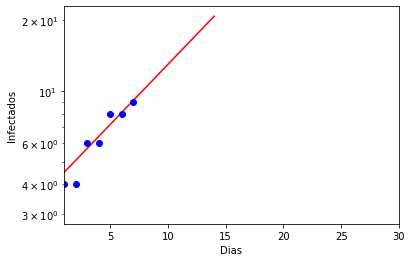

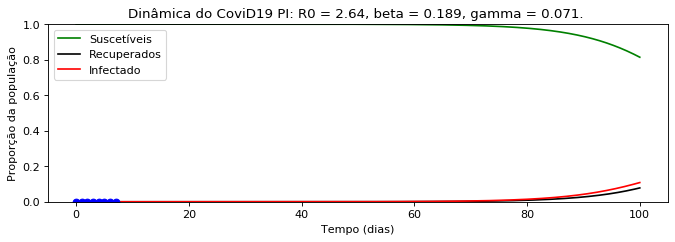

 1/21    0.17  3.35


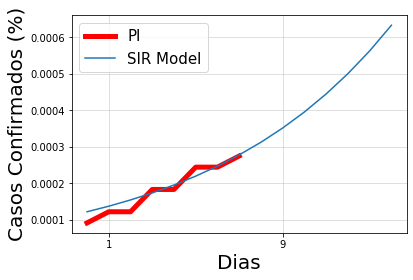

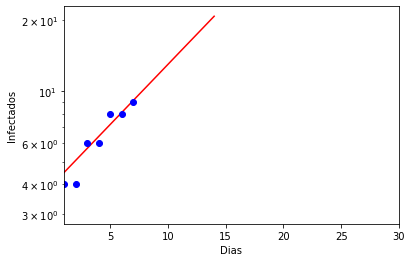

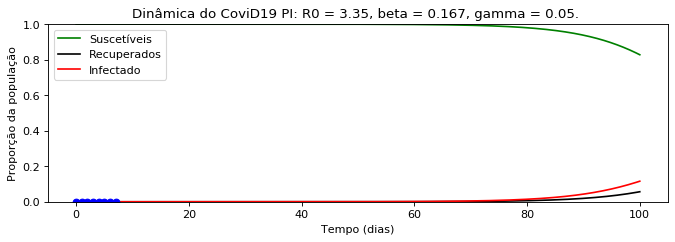



2020-03-19
Resultados gerais para o estado RO
 Gamma  Beta   R0 
 1/5    0.46  2.28


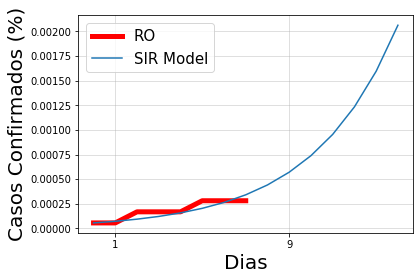

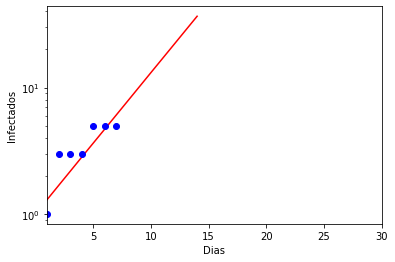

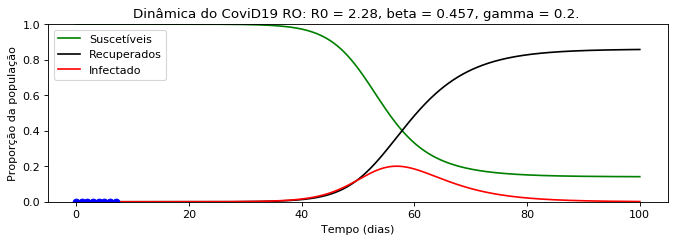

 1/14    0.33  4.59


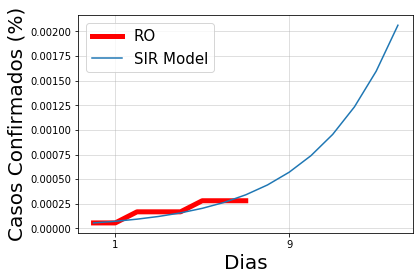

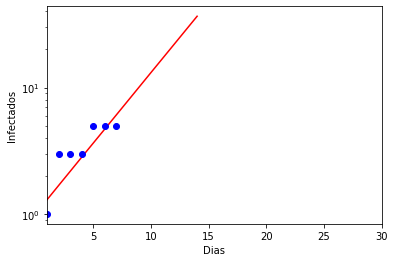

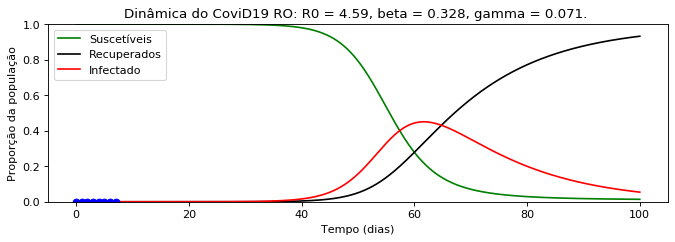

 1/21    0.31  6.13


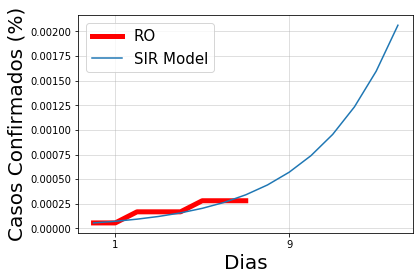

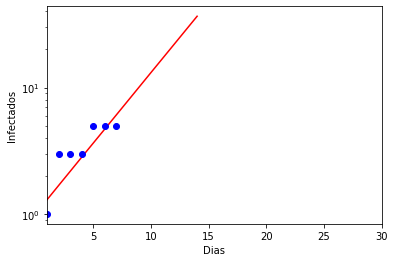

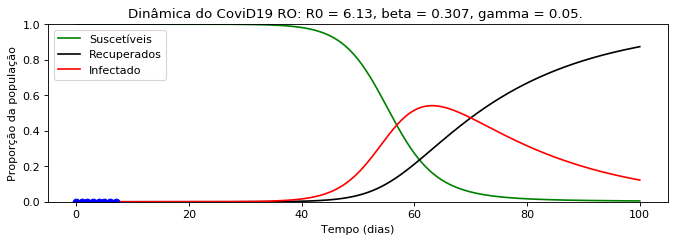



2020-03-20
Resultados gerais para o estado AP
 Gamma  Beta   R0 
 1/5    0.3  1.5


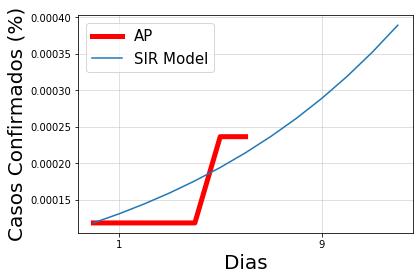

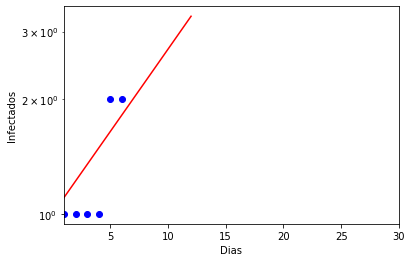

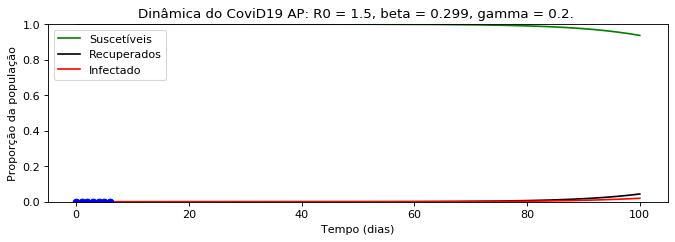

 1/14    0.17  2.39


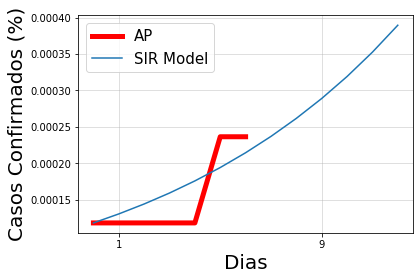

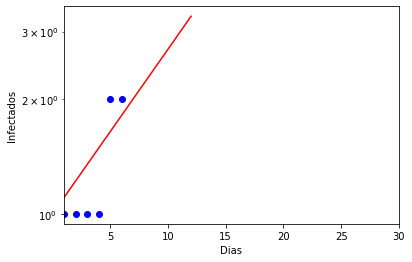

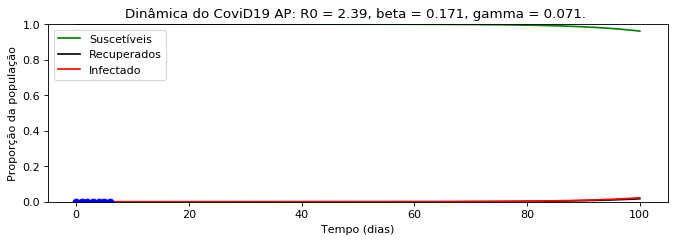

 1/21    0.15  2.98


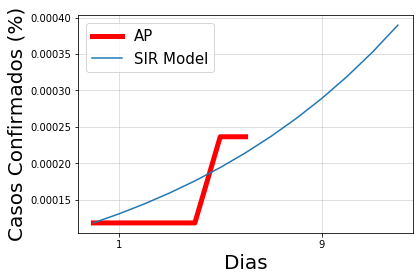

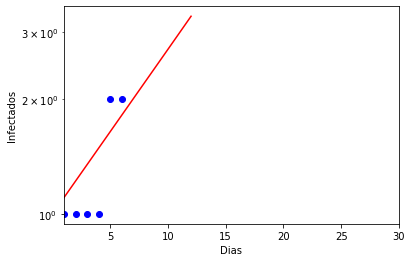

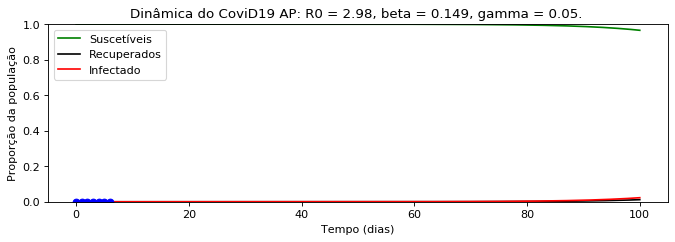



2020-03-20
Resultados gerais para o estado MA
 Gamma  Beta   R0 
 1/5    0.48  2.4


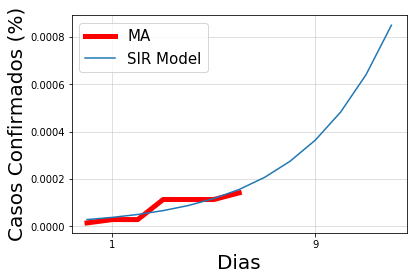

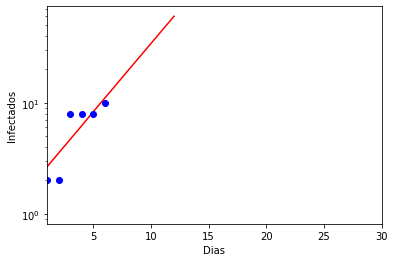

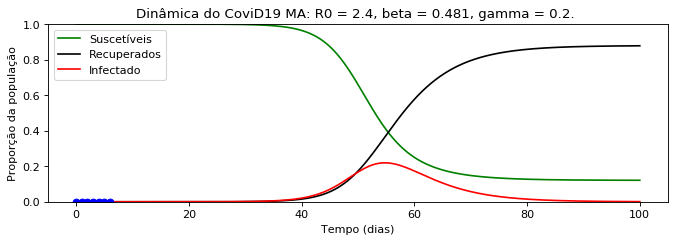

 1/14    0.35  4.93


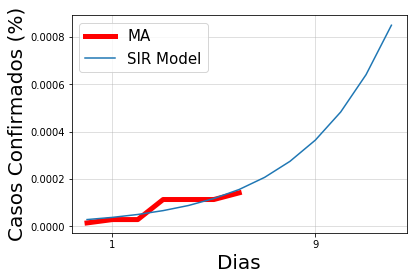

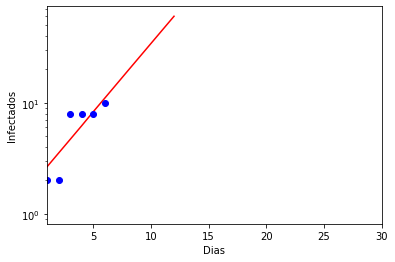

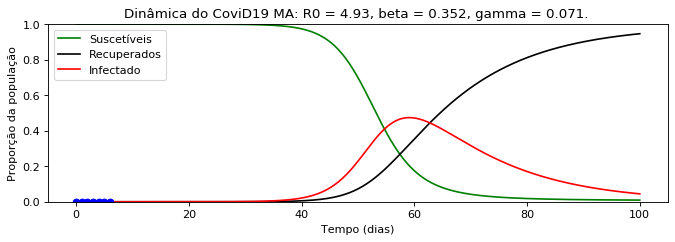

 1/21    0.33  6.62


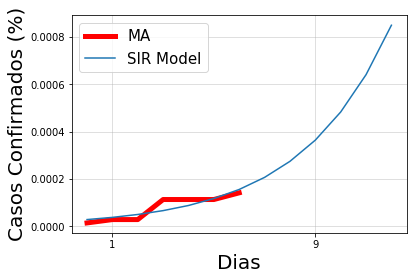

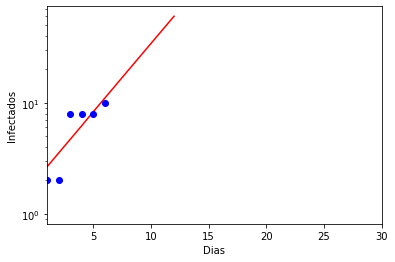

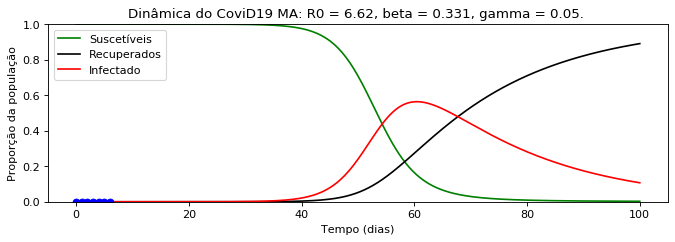



2020-03-21
Resultados gerais para o estado RR
 Gamma  Beta   R0 
 1/5    0.51  2.54


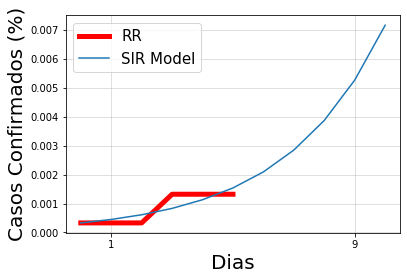

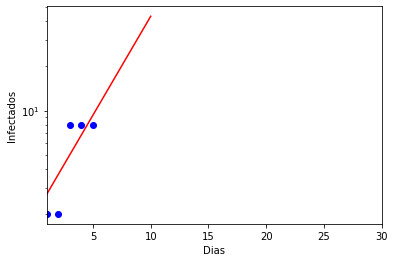

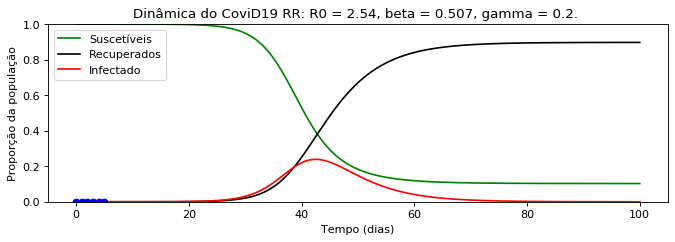

 1/14    0.38  5.3


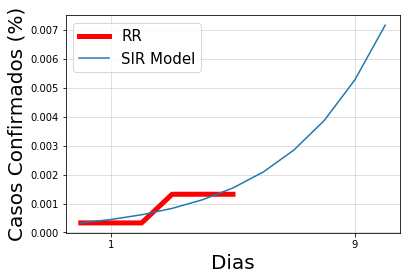

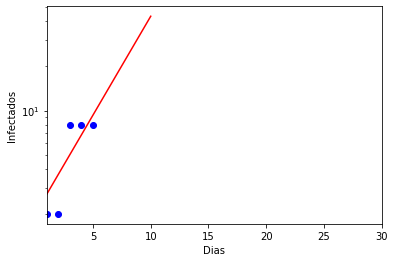

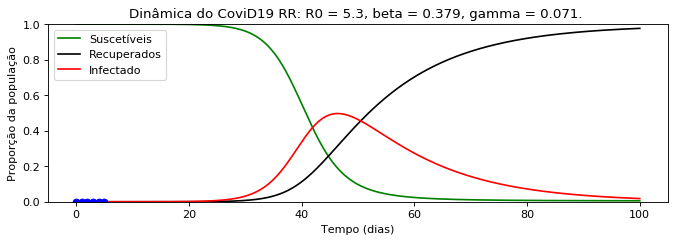

 1/21    0.36  7.15


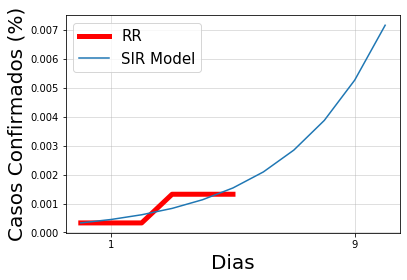

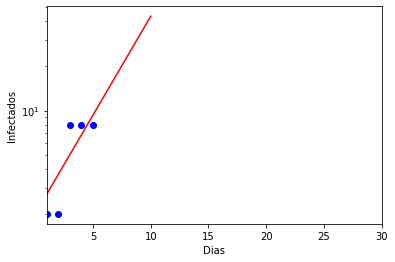

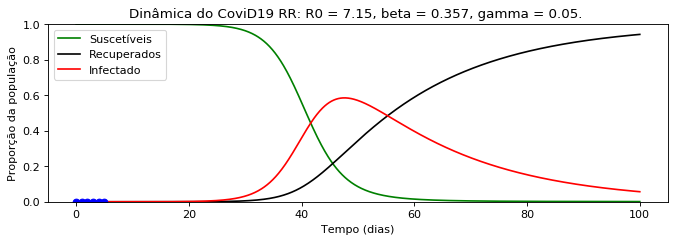

In [7]:
#n = 27

for n in range(len(pop)):
    UF = df[0][n] #df.state.unique()[n]

    dfUF = np.array(df[1][n]['totalCases'])
    
    date = df[1][n]['date'][0]
    
    print(date)



    popUF = pop[pop.UF == UF]['pop'].unique()

    dfUF_norm = dfUF/popUF

    I0 = dfUF_norm[1]
    S0= 1 -I0


    #print('condições iniciais para ' + UF)

    data = dfUF_norm
    pop2 = popUF


    def diff_eqs(INP,t,beta,gamma):  
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP    
        Y[0] = - beta * V[0] * V[1]
        Y[1] = beta * V[0] * V[1] - gamma * V[1]
        Y[2] = gamma * V[1]
        return Y   # For odeint

    #Optimisation Function which minimises the MSE between the SIR model and the data
    def fitness_function(x):

        beta = x[0]
        gamma = x[1]

        result = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))

        mean_squared_error = ((np.array(data)-result[:,1])**2).mean()       

        return [mean_squared_error]

    #GA Parameters
    number_of_generations = 10000
    ga_population_size = 100
    number_of_objective_targets = 1 # The MSE
    number_of_constraints = 0
    number_of_input_variables = 2 # beta and gamma
    problem = Problem(number_of_input_variables,number_of_objective_targets,number_of_constraints)
    problem.types[0] =  Real(0, 1)  #beta initial Range

    print('Resultados gerais para o estado ' + UF)
    print(' Gamma ' + ' Beta ' + '  R0 ')

    for j in range(3):
        if (j == 0):
            problem.types[1] =  Real(1/5-0.00000001, 1/22+-0.00000001)   #gamma initial Range
            #problem.types[1] =  Real(1/14-0.00000001, 1/20)              #
            #problem.types[1] =  Real(1/20-0.00000001, 1/22+-0.00000001)

            problem.function = fitness_function
            algorithm = NSGAII(problem, population_size = ga_population_size)


            #The model needs to output in the same shape as the data to be fitted
            TS=1
            ND=len(data)-1

            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)


            INPUT = (S0, I0, 0.0) # R(0) = 0

            #Running the GA
            algorithm.run(number_of_generations)

            #Getting the feasible solutions only just to be safe
            #The GA may generate bad solutions if number_of_generations is not enough or there are too many contraints
            feasible_solutions = [s for s in algorithm.result if s.feasible]

            beta = feasible_solutions[0].variables[0]    
            #print('Beta Optimsed = {}'.format(round(beta,2)))
            gamma= feasible_solutions[0].variables[1]    
            #print('Gamma Optimsed = {}'.format(round(gamma,2)))
            R0 = beta/gamma
            #print('R0 = {}'.format(round(R0,2)))
            print(' 1/5 ' + '   {} '.format(round(beta,2)) + ' {}'.format(round(R0,2)))
            
            #Running the model and plotting with the optimised values
            ND=2*(len(data)-1)
            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))
    

            pl.plot(data*100, c = 'red', label=UF,linewidth=5)
            pl.plot(RES[:,1]*100, label='SIR Model')
            pl.xlabel('Dias',fontsize=20)
            pl.ylabel('Casos Confirmados (%)',fontsize=20)
            pl.xticks(range(1,t_end+1,8),fontsize=10)
            pl.grid(alpha = 0.5,which='both')
            pl.legend(fontsize=15)
            pl.show()
            
            pl.semilogy(RES[:,1]*pop2, '-r', label='Infectados')
            pl.semilogy(data*pop2, 'ob')
            #pl.loglog(time2,func(time2)/14873064, '-g')
            pl.xlim(1,30)
            pl.xlabel('Dias')
            pl.ylabel('Infectados')
            pl.show()
            
            # Save projection
            dataset = pd.DataFrame({'S': RES[:, 0]*pop2, 'I': RES[:, 1]*pop2, 'R':RES[:, 2]*pop2})
            
            dataset.to_csv('predito26_03_{}_gamma1_14.csv'.format(UF))
            #Now, running the model for a longer period
            TS=0.1
            ND=100
            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))
            
            #Ploting of the fitted curve only
            from matplotlib.pyplot import figure
            figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
            pl.subplot(311)
            pl.plot(t_range,RES[:,0], '-g', label='Suscetíveis')
            pl.plot(t_range,RES[:,2], '-k', label='Recuperados')
            pl.plot(t_range,RES[:,1], '-r', label='Infectado')
            pl.plot(data, 'ob')
            pl.ylim(0,1)
            pl.legend(loc=0)
            pl.title('Dinâmica do CoviD19 {}: R0 = {}, beta = {}, gamma = {}. '.format(UF,round(R0,2),round(beta,3),round(gamma,3)))
            pl.ylabel('Proporção da população')
            pl.xlabel('Tempo (dias)')
            pl.savefig('plot1_25_03_{}_gamma1_5.pdf'.format(UF))
            pl.show()
        elif (j == 1):
            #problem.types[1] =  Real(1/5-0.00000001, 1/22+-0.00000001)   #gamma initial Range
            problem.types[1] =  Real(1/14-0.00000001, 1/20)              #
            #problem.types[1] =  Real(1/20-0.00000001, 1/22+-0.00000001)

            problem.function = fitness_function
            algorithm = NSGAII(problem, population_size = ga_population_size)


            #The model needs to output in the same shape as the data to be fitted
            TS=1
            ND=len(data)-1

            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)


            INPUT = (S0, I0, 0.0) # R(0) = 0

            #Running the GA
            algorithm.run(number_of_generations)

            #Getting the feasible solutions only just to be safe
            #The GA may generate bad solutions if number_of_generations is not enough or there are too many contraints
            feasible_solutions = [s for s in algorithm.result if s.feasible]

            beta = feasible_solutions[0].variables[0]    
            #print('Beta Optimsed = {}'.format(round(beta,2)))
            gamma= feasible_solutions[0].variables[1]    
            #print('Gamma Optimsed = {}'.format(round(gamma,2)))
            R0 = beta/gamma
            #print('R0 = {}'.format(round(R0,2)))
            print(' 1/14 ' + '   {} '.format(round(beta,2)) + ' {}'.format(round(R0,2)))
            
            #Running the model and plotting with the optimised values
            ND=2*(len(data)-1)
            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))

            pl.plot(data*100, c = 'red', label=UF,linewidth=5)
            pl.plot(RES[:,1]*100, label='SIR Model')
            pl.xlabel('Dias',fontsize=20)
            pl.ylabel('Casos Confirmados (%)',fontsize=20)
            pl.xticks(range(1,t_end+1,8),fontsize=10)
            pl.grid(alpha = 0.5,which='both')
            pl.legend(fontsize=15)
            pl.show()
            
            pl.semilogy(RES[:,1]*pop2, '-r', label='Infectados')
            pl.semilogy(data*pop2, 'ob')
            #pl.loglog(time2,func(time2)/14873064, '-g')
            pl.xlim(1,30)
            pl.xlabel('Dias')
            pl.ylabel('Infectados')
            pl.show()
            
            # Save projection
            dataset = pd.DataFrame({'S': RES[:, 0]*pop2, 'I': RES[:, 1]*pop2, 'R':RES[:, 2]*pop2})
            dataset.to_csv('predito26_03_{}_gamma1_14.csv'.format(UF))
            
             #Now, running the model for a longer period
            TS=0.1
            ND=100
            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))
            
            #Ploting of the fitted curve only
            from matplotlib.pyplot import figure
            figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
            pl.subplot(311)
            pl.plot(t_range,RES[:,0], '-g', label='Suscetíveis')
            pl.plot(t_range,RES[:,2], '-k', label='Recuperados')
            pl.plot(t_range,RES[:,1], '-r', label='Infectado')
            pl.plot(data, 'ob')
            pl.ylim(0,1)
            pl.legend(loc=0)
            pl.title('Dinâmica do CoviD19 {}: R0 = {}, beta = {}, gamma = {}. '.format(UF,round(R0,2),round(beta,3),round(gamma,3)))
            pl.ylabel('Proporção da população')
            pl.xlabel('Tempo (dias)')
            pl.savefig('plot1_25_03_{}_gamma1_14.pdf'.format(UF))
            pl.show()
        else:
            #problem.types[1] =  Real(1/5-0.00000001, 1/22+-0.00000001)   #gamma initial Range
            #problem.types[1] =  Real(1/14-0.00000001, 1/20)              #
            problem.types[1] =  Real(1/20-0.00000001, 1/22+-0.00000001)

            problem.function = fitness_function
            algorithm = NSGAII(problem, population_size = ga_population_size)


            #The model needs to output in the same shape as the data to be fitted
            TS=1
            ND=len(data)-1

            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)


            INPUT = (S0, I0, 0.0) # R(0) = 0

            #Running the GA
            algorithm.run(number_of_generations)

            #Getting the feasible solutions only just to be safe
            #The GA may generate bad solutions if number_of_generations is not enough or there are too many contraints
            feasible_solutions = [s for s in algorithm.result if s.feasible]

            beta = feasible_solutions[0].variables[0]    
            #print('Beta Optimsed = {}'.format(round(beta,2)))
            gamma= feasible_solutions[0].variables[1]    
            #print('Gamma Optimsed = {}'.format(round(gamma,2)))
            R0 = beta/gamma
            #print('R0 = {}'.format(round(R0,2)))
            print(' 1/21 ' + '   {} '.format(round(beta,2)) + ' {}'.format(round(R0,2)))
            
            #Running the model and plotting with the optimised values
            ND=2*(len(data)-1)
            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))

            pl.plot(data*100, c = 'red', label=UF,linewidth=5)
            pl.plot(RES[:,1]*100, label='SIR Model')
            pl.xlabel('Dias',fontsize=20)
            pl.ylabel('Casos Confirmados (%)',fontsize=20)
            pl.xticks(range(1,t_end+1,8),fontsize=10)
            pl.grid(alpha = 0.5,which='both')
            pl.legend(fontsize=15)
            pl.show()
            
            pl.semilogy(RES[:,1]*pop2, '-r', label='Infectados')
            pl.semilogy(data*pop2, 'ob')
            #pl.loglog(time2,func(time2)/14873064, '-g')
            pl.xlim(1,30)
            pl.xlabel('Dias')
            pl.ylabel('Infectados')
            pl.show()
            
            # Save projection
            dataset = pd.DataFrame({'S': RES[:, 0]*pop2, 'I': RES[:, 1]*pop2, 'R':RES[:, 2]*pop2})
            dataset.to_csv('predito26_03_{}_gamma1_21.csv'.format(UF))
            
             #Now, running the model for a longer period
            TS=0.1
            ND=100
            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range,args=(beta,gamma))
            
            #Ploting of the fitted curve only
            from matplotlib.pyplot import figure
            figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
            pl.subplot(311)
            pl.plot(t_range,RES[:,0], '-g', label='Suscetíveis')
            pl.plot(t_range,RES[:,2], '-k', label='Recuperados')
            pl.plot(t_range,RES[:,1], '-r', label='Infectado')
            pl.plot(data, 'ob')
            pl.ylim(0,1)
            pl.legend(loc=0)
            pl.title('Dinâmica do CoviD19 {}: R0 = {}, beta = {}, gamma = {}. '.format(UF,round(R0,2),round(beta,3),round(gamma,3)))
            pl.ylabel('Proporção da população')
            pl.xlabel('Tempo (dias)')
            pl.savefig('plot1_25_03_{}_gamma1_21.pdf'.format(UF))
            pl.show()
            print('\r\n')

FIM